# EEG classification: Andrzejak's dataset (ZFS) with white noise

In [1]:
%%html
<!--hide_me_please-->

<p class="showoutput_report_view" id="first123456aa_article_view"><a href="javascript:output_report_or_work_toggle('#first123456_work_view')">show the report view</a></p>
<p class="showoutput_work_view" id="first123456_work_view"><a href="javascript:output_report_or_work_toggle('#first123456aa_article_view')">show the work view</a></p>

<p class="showcode" id="first123456aa"><a href="javascript:code_toggle('#first123456')">show codes in the notebook</a></p>
<p class="hidecode" id="first123456"><a href="javascript:code_toggle('#first123456aa')">hide codes in the notebook</a></p>

<p class="showoutput_text" id="first123456aa_text"><a href="javascript:output_text_toggle('#first123456_text')">show text outputs in the notebook</a></p>
<p class="hideoutput_text" id="first123456_text"><a href="javascript:output_text_toggle('#first123456aa_text')">hide text outputs in the notebook</a></p>

In [2]:
# hide_me_please
from IPython.display import HTML


def this_is_temporary_cell():
    cell_output_is_temporary()


def cell_output_is_temporary():
    HTML("<!--this_is_temporary_output-->")
    print("# this_is_temporary_output")

In [3]:
# hide_me_please
from IPython.display import HTML


def this_is_temporary_cell():
    cell_output_is_temporary()


def cell_output_is_temporary():
    HTML("<!--this_is_temporary_output-->")
    print("# this_is_temporary_output")

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Initialization" data-toc-modified-id="1.-Initialization-1">1. Initialization</a></span></li><li><span><a href="#2.-Loading-data-and-adding-transformed-features" data-toc-modified-id="2.-Loading-data-and-adding-transformed-features-2">2. Loading data and adding transformed features</a></span><ul class="toc-item"><li><span><a href="#(Z),-(F),-(S)" data-toc-modified-id="(Z),-(F),-(S)-2.1">(Z), (F), (S)</a></span></li></ul></li><li><span><a href="#3.-Guo-et-al.-(2012)-basic-statistics-of-wavelet-decomposition-–-KNN" data-toc-modified-id="3.-Guo-et-al.-(2012)-basic-statistics-of-wavelet-decomposition-–-KNN-3">3. Guo et al. (2012) basic statistics of wavelet decomposition – KNN</a></span><ul class="toc-item"><li><span><a href="#3.1.-Parameters-selection" data-toc-modified-id="3.1.-Parameters-selection-3.1">3.1. Parameters selection</a></span></li><li><span><a href="#3.2.-Final-scores" data-toc-modified-id="3.2.-Final-scores-3.2">3.2. Final scores</a></span></li></ul></li><li><span><a href="#5.-AR-of-single-signal-–&nbsp;KNN" data-toc-modified-id="5.-AR-of-single-signal-–&nbsp;KNN-4">5. AR of single signal –&nbsp;KNN</a></span><ul class="toc-item"><li><span><a href="#5.1.-Parameters-selection" data-toc-modified-id="5.1.-Parameters-selection-4.1">5.1. Parameters selection</a></span><ul class="toc-item"><li><span><a href="#5.1.1.-Iteration-no.-1" data-toc-modified-id="5.1.1.-Iteration-no.-1-4.1.1">5.1.1. Iteration no. 1</a></span></li><li><span><a href="#5.1.2.-Iteration-no.-2" data-toc-modified-id="5.1.2.-Iteration-no.-2-4.1.2">5.1.2. Iteration no. 2</a></span></li></ul></li><li><span><a href="#5.2.-Final-scores" data-toc-modified-id="5.2.-Final-scores-4.2">5.2. Final scores</a></span></li></ul></li><li><span><a href="#6.-AR-based-PSD-of-single-signal-–-KNN" data-toc-modified-id="6.-AR-based-PSD-of-single-signal-–-KNN-5">6. AR-based PSD of single signal – KNN</a></span><ul class="toc-item"><li><span><a href="#6.1.-Parameters-selection" data-toc-modified-id="6.1.-Parameters-selection-5.1">6.1. Parameters selection</a></span><ul class="toc-item"><li><span><a href="#6.1.1.-Iteration-no.-1" data-toc-modified-id="6.1.1.-Iteration-no.-1-5.1.1">6.1.1. Iteration no. 1</a></span></li><li><span><a href="#6.1.2.-Iteration-no.-2" data-toc-modified-id="6.1.2.-Iteration-no.-2-5.1.2">6.1.2. Iteration no. 2</a></span></li></ul></li><li><span><a href="#6.2.-Final-scores" data-toc-modified-id="6.2.-Final-scores-5.2">6.2. Final scores</a></span></li></ul></li><li><span><a href="#7.-AR-of-single-signal-–&nbsp;logistic-regression" data-toc-modified-id="7.-AR-of-single-signal-–&nbsp;logistic-regression-6">7. AR of single signal –&nbsp;logistic regression</a></span><ul class="toc-item"><li><span><a href="#7.1.-Parameters-selection" data-toc-modified-id="7.1.-Parameters-selection-6.1">7.1. Parameters selection</a></span></li><li><span><a href="#7.2.-Final-scores" data-toc-modified-id="7.2.-Final-scores-6.2">7.2. Final scores</a></span></li></ul></li><li><span><a href="#8.-AR-of-single-signal-–&nbsp;MLP" data-toc-modified-id="8.-AR-of-single-signal-–&nbsp;MLP-7">8. AR of single signal –&nbsp;MLP</a></span><ul class="toc-item"><li><span><a href="#8.1.-Parameters-selection" data-toc-modified-id="8.1.-Parameters-selection-7.1">8.1. Parameters selection</a></span></li><li><span><a href="#8.2.-Final-scores" data-toc-modified-id="8.2.-Final-scores-7.2">8.2. Final scores</a></span></li></ul></li><li><span><a href="#9.-Models-performance-ranking" data-toc-modified-id="9.-Models-performance-ranking-8">9. Models performance ranking</a></span></li><li><span><a href="#END" data-toc-modified-id="END-9">END</a></span></li></ul></div>

## 1. Initialization

In [35]:
# !pip install ../timeseries/
# !pip install git+https://github.com/krzpiesiewicz/timeseries

<IPython.core.display.Javascript object>

In [36]:
# !pip uninstall timeseries

<IPython.core.display.Javascript object>

In [37]:
# !pip install cesium

<IPython.core.display.Javascript object>

In [38]:
# !pip install PyWavelets

<IPython.core.display.Javascript object>

In [6]:
# load extensions
%load_ext nb_black
%load_ext autoreload
%autoreload 2
%aimport timeseries

<IPython.core.display.Javascript object>

In [7]:
import IPython.display
from pprint import pprint
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

import timeseries as tss
from timeseries import plot_ts
from timeseries.transform import IHSTransformer, get_smoothed

from cesium import datasets, featurize
import pywt

from codes.ar_psd import (
    ols,
    burg,
    ld_biased,
    ar_coeffs,
    psd_fun_from_ar,
    ar_features,
    psd_ar_features,
)
from codes.guo import guo_features
from codes.knn import knn_scores
from codes.logreg import logreg_scores
from codes.mlp import mlp_scores
from codes.selection import (
    start_timer,
    set_work,
    print_progress,
    print_res,
    sorted_by_score,
    simple_scorings,
    full_scorings,
)

<IPython.core.display.Javascript object>

In [8]:
# import warnings

# warnings.filterwarnings("ignore")
plt.rcParams.update(
    {
        "figure.max_open_warning": 0,
    }
)

<IPython.core.display.Javascript object>

## 2. Loading data and adding transformed features

### (Z), (F), (S)

In [9]:
eeg = datasets.fetch_andrzejak()

###Group together classes (Z, O), (N, F), (S) as normal, interictal, ictal
eeg["classes"] = eeg["classes"].astype("U16")  #  allocate memory for longer class names
mask = ~np.logical_or(eeg["classes"] == "O", eeg["classes"] == "N")
ids = np.where(mask)[0]
eeg["measurements"] = [eeg["measurements"][i] for i in ids]
eeg["classes"] = eeg["classes"][mask]
eeg["classes"][eeg["classes"] == "Z"] = "Normal"
eeg["classes"][eeg["classes"] == "F"] = "Interictal"
eeg["classes"][eeg["classes"] == "S"] = "Ictal"

Loaded data from cached archive.


<IPython.core.display.Javascript object>

In [10]:
def gen_wn(ts, seed):
    rng = np.random.default_rng(seed)
    wn_sum = 0

    rand_fun = rng.laplace

    for s in [3, 6]:
        wn0 = rand_fun(0, 1, len(ts))
        wn1 = rand_fun(0, 1, len(ts))
        wn2 = rand_fun(0, 1, len(ts))
        wn3 = rand_fun(0, 1, len(ts))
        wn4 = rand_fun(0, 1, len(ts))
        wn5 = rand_fun(0, 1, len(ts))
        wn6 = rand_fun(0, 1, len(ts))
        wn7 = rand_fun(0, 1, len(ts))
        wn8 = rand_fun(0, 1, len(ts))
        wn9 = rand_fun(0, 1, len(ts))
        wn = wn0 * wn1 * wn2 * wn3 * wn4  # * wn5 * wn6 * wn7 * wn8 * wn9
        wn = get_smoothed(pd.Series(wn), std=s, only_prevs=False)
        wn = wn * np.std(ts) / np.std(wn) / np.sqrt(s)
        wn_sum += wn
    wn = wn_sum * np.std(ts) / np.std(wn_sum) * 2
    #     wn = np.minimum(wn, 5 * np.std(ts))
    #     wn = np.maximum(wn, -5 * np.std(ts))
    return wn.values

<IPython.core.display.Javascript object>

In [11]:
trans_ids = np.where(eeg["classes"] == "Normal")[0]

<IPython.core.display.Javascript object>

In [12]:
np.unique(eeg["classes"], return_counts=True)

(array(['Ictal', 'Interictal', 'Normal'], dtype='<U16'),
 array([100, 100, 100]))

<IPython.core.display.Javascript object>

In [13]:
select_params_idx, eval_idx, _, _ = train_test_split(
    np.arange(0, len(eeg["classes"])), eeg["classes"], random_state=7, train_size=100
)
select_params_idx = pd.Index(np.sort(select_params_idx))
eval_idx = pd.Index(np.sort(eval_idx))

<IPython.core.display.Javascript object>

In [14]:
df = pd.DataFrame({"class": eeg["classes"][eval_idx]})
df["i"] = 1
df.groupby("class").count()

,i
class,
Ictal,68
Interictal,68
Normal,64


<IPython.core.display.Javascript object>

In [15]:
len(select_params_idx)

100

<IPython.core.display.Javascript object>

In [16]:
len(eval_idx)

200

<IPython.core.display.Javascript object>

In [17]:
train_size = 90

<IPython.core.display.Javascript object>

In [18]:
sampling_freq = 173.6  # Hz

<IPython.core.display.Javascript object>

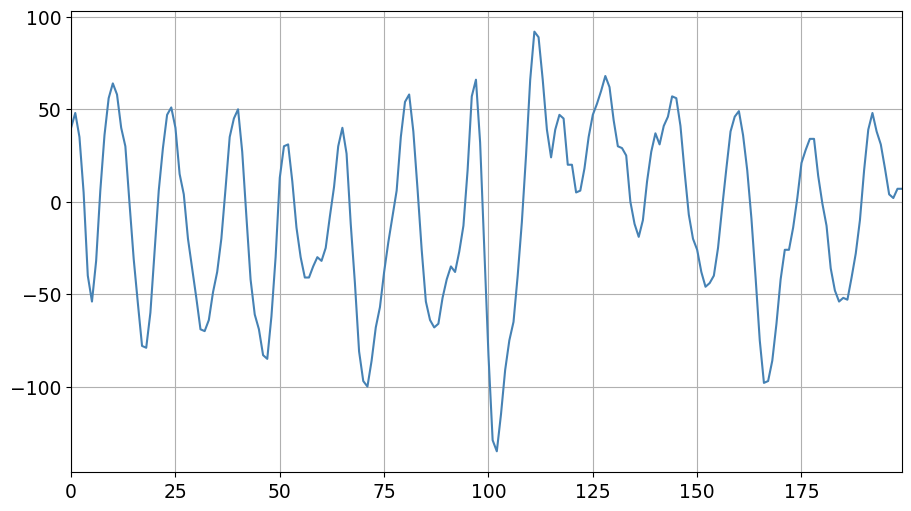

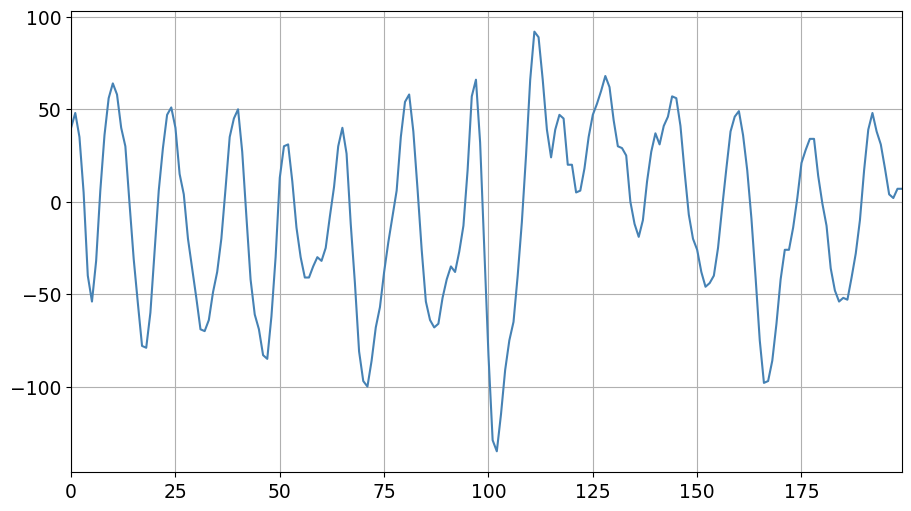

<IPython.core.display.Javascript object>

In [19]:
ts = eeg["measurements"][0][:200]
fig = plot_ts(ts)
fig

In [20]:
eeg["measurements_with_wn"] = [
    m + gen_wn(m, idx) for idx, m in enumerate(eeg["measurements"])
]

<IPython.core.display.Javascript object>

In [21]:
wn_ts = gen_wn(eeg["measurements"][0], 0)

<IPython.core.display.Javascript object>

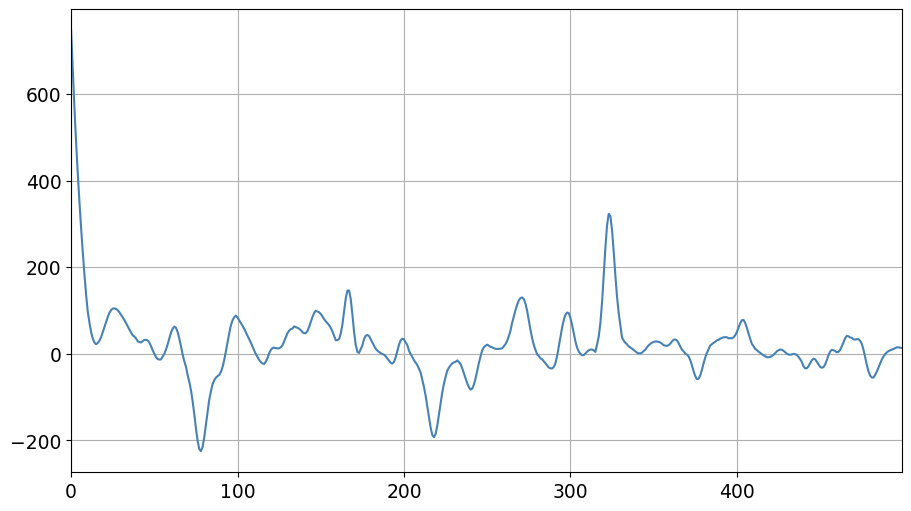

<IPython.core.display.Javascript object>

In [22]:
plot_ts(wn_ts[:500])

In [23]:
from timeseries.analysis import acf, pacf, plot_acf, plot_pacf, plot_stats

<IPython.core.display.Javascript object>

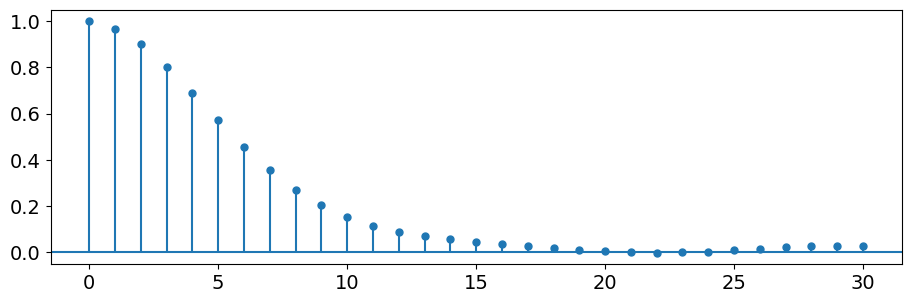

<IPython.core.display.Javascript object>

In [24]:
plot_acf(wn_ts, nlags=30, title="", ax_height=200)

In [25]:
# mean_autocorr
from statsmodels.tsa.stattools import acovf
from scipy.stats import norm


def mean_autocorr(begins, ends, title=None, subtitle=None, nlags=20):
    print(f"Intervals: {[[begin, end] for begin, end in zip(begins, ends)]}")
    ts_len = ends[0] - begins[0]
    #     if title is None:
    #         title = "Mean Autocovariance"
    kwargs = dict(title=title, subtitle=subtitle, showgrid=True, ax_height=300)
    fig = None
    for ts, ts_name, color in [
        (wn_ts, "standard", "darkblue"),
    ]:
        autocorrs = np.zeros((len(begins), nlags + 1))
        for i, (begin, end) in enumerate(zip(begins, ends)):
            autocorrs[i, :] = acovf(ts[begin:end], fft=False)[: nlags + 1]
            autocorrs[i, :] /= autocorrs[i, 0]
        mu = np.mean(autocorrs, 0)
        std = np.std(autocorrs, 0)
        fig = plot_stats(
            mu,
            std=std,
            xs=np.arange(0, nlags + 1),
            #             label=ts_name,
            color=color,
            **kwargs,
        )
        kwargs = dict(fig=fig)
    conf_value = norm.ppf(1 - alpha / 2.0) * np.sqrt(1.0 / ts_len)
    plot_ts(
        pd.Series([conf_value] * 2, index=[-0.5, nlags + 0.5]),
        linestyle="--",
        color="gray",
        name=f"{100 * (1-alpha)}% confidence interval",
        fig=fig,
    )
    plot_ts(
        pd.Series([-conf_value] * 2, index=[-0.5, nlags + 0.5]),
        linestyle="--",
        color="gray",
        fig=fig,
    )
    display(fig)

<IPython.core.display.Javascript object>

In [26]:
len(wn_ts)

4097

<IPython.core.display.Javascript object>

Intervals: [[0, 1000], [500, 1500], [1000, 2000], [1500, 2500], [2000, 3000], [2500, 3500], [3000, 4000]]


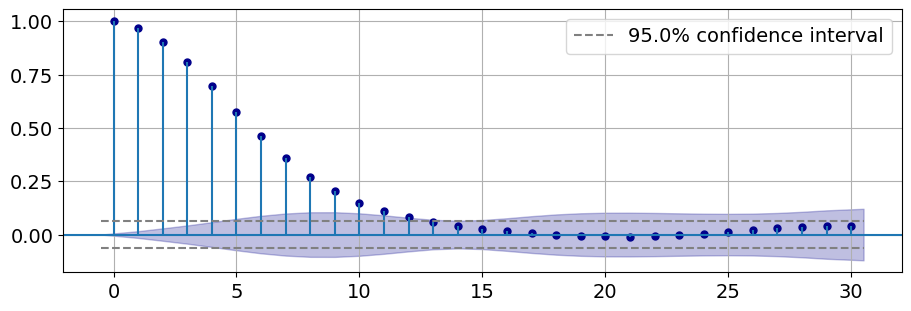

<IPython.core.display.Javascript object>

In [27]:
# Mean Autocorrelations
alpha = 0.05
nlags = 30
ts_idx = 10
ts_len = 1000
step = 500
begin = 0
begins = np.arange(begin, 4001 - ts_len, step)
ends = np.arange(begin + ts_len, 4001, step)

mean_autocorr(
    begins,
    ends,
    #     subtitle=f"{len(begins)} intervals of length {ts_len} from the same EEG signal (ts[{ts_idx}])",
    nlags=nlags,
)

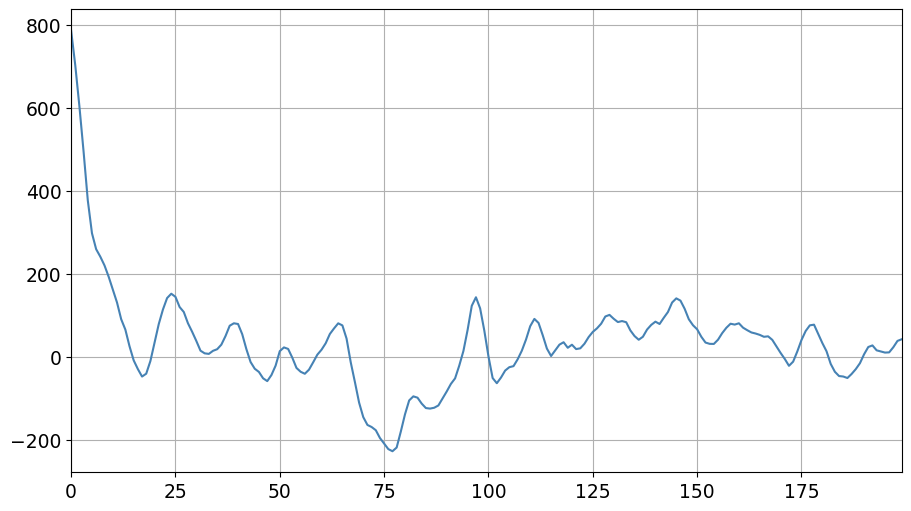

<IPython.core.display.Javascript object>

In [28]:
ts = eeg["measurements_with_wn"][0][:200]
fig = plot_ts(ts)
fig

In [29]:
n_channels = 4
eeg["dwts"] = [
    pywt.wavedec(
        m,
        pywt.Wavelet("db1"),
        level=n_channels - 1,
    )
    for m in eeg["measurements_with_wn"]
]

<IPython.core.display.Javascript object>

In [30]:
%%time
# standard normalization
transformation_train_intv = tss.Interval(eeg["measurements_with_wn"][0], 0, 1000)
standard_trans = [
    IHSTransformer(transformation_train_intv.view(ts), d=0, lmb=None, verbose=True) for ts in eeg["measurements_with_wn"]
]
eeg["measurements_normed"] = [trans.transform(ts) for ts, trans in zip(eeg["measurements_with_wn"], standard_trans)]

CPU times: user 1.17 s, sys: 8.93 ms, total: 1.18 s
Wall time: 1.19 s


<IPython.core.display.Javascript object>

In [31]:
# %%time
# # IHS normalization
# ihs_trans = [
#     IHSTransformer(transformation_train_intv.view(ts), d=0, verbose=True) for ts in eeg["measurements_wiht_wn"]
# ]

<IPython.core.display.Javascript object>

In [32]:
this_is_temporary_cell()

lmbs = [
    0.010624999999999999,
    0.010953125,
    0.012328124999999997,
    0.017874999999999995,
    0.019640624999999988,
    0.017249999999999995,
    0.01934374999999999,
    0.017968749999999995,
    0.016843749999999994,
    0.013093749999999998,
    0.012968749999999998,
    0.016249999999999994,
    0.0111875,
    0.016281249999999994,
    0.023624999999999986,
    0.007887500000000004,
    0.015281249999999996,
    0.015593749999999993,
    0.008725000000000004,
    0.02181249999999999,
    0.029874999999999985,
    0.03565624999999997,
    0.014531249999999996,
    0.017406249999999995,
    0.0071125000000000025,
    0.014328124999999995,
    0.015749999999999993,
    None,
    0.02128124999999999,
    0.006925000000000002,
    0.02071874999999999,
    0.01956249999999999,
    0.008606250000000003,
    0.013874999999999998,
    0.018218749999999995,
    0.0116875,
    None,
    0.008512500000000004,
    0.012515624999999997,
    0.009887500000000002,
    0.0070500000000000024,
    0.006587500000000003,
    0.024656249999999987,
    0.007487500000000003,
    0.014656249999999996,
    0.027499999999999986,
    0.0116875,
    0.013874999999999998,
    0.0038500000000000014,
    0.018718749999999996,
    0.01996874999999999,
    0.018687499999999996,
    0.025062499999999988,
    0.014624999999999996,
    0.016812499999999994,
    0.014156249999999995,
    0.015937499999999993,
    0.019031249999999993,
    0.02201562499999999,
    0.008512500000000004,
    0.002650000000000001,
    0.015656249999999993,
    0.02046874999999999,
    0.014890624999999996,
    0.017812499999999995,
    0.03174999999999999,
    0.017749999999999995,
    0.013937499999999999,
    0.007250000000000003,
    0.010124999999999999,
    0.0023500000000000005,
    0.018499999999999996,
    0.012484374999999997,
    0.017515624999999993,
    0.02303124999999999,
    0.02693749999999999,
    0.011007812499999999,
    0.012203124999999997,
    0.015562499999999993,
    0.014906249999999996,
    0.009875000000000002,
    0.011828125,
    0.011171875,
    0.01949999999999999,
    0.010062499999999999,
    0.009837500000000002,
    0.015968749999999993,
    0.012687499999999997,
    0.011984374999999999,
    0.015562499999999993,
    0.014843749999999996,
    0.017843749999999995,
    0.017062499999999994,
    0.017390624999999993,
    0.024968749999999987,
    0.008237500000000003,
    0.013374999999999998,
    0.013874999999999998,
    0.02112499999999999,
    0.017640624999999993,
    0.008325000000000003,
    0.006975000000000003,
    0.009606250000000004,
    0.013140624999999998,
    0.008875000000000004,
    0.018562499999999996,
    0.014031249999999995,
    0.012624999999999997,
    0.0017781250000000002,
    0.007431250000000003,
    0.015656249999999993,
    0.010203124999999999,
    0.016062499999999993,
    0.023468749999999986,
    0.02606249999999999,
    0.008775000000000002,
    0.015906249999999993,
    0.008337500000000003,
    0.010218749999999999,
    0.013156249999999998,
    0.007968750000000004,
    0.0045937500000000015,
    0.012140624999999997,
    0.012328124999999997,
    0.008862500000000004,
    0.040937499999999974,
    0.010796875,
    0.013843749999999998,
    0.005293750000000002,
    0.0051750000000000025,
    0.009425000000000006,
    0.005987500000000003,
    0.011390625,
    0.015749999999999993,
    0.013343749999999998,
    0.017562499999999995,
    0.014531249999999996,
    0.008112500000000003,
    0.008437500000000004,
    0.018093749999999995,
    0.017406249999999995,
    0.023968749999999987,
    0.007193750000000002,
    0.006850000000000003,
    0.014359374999999995,
    0.014296874999999995,
    0.010046874999999999,
    0.012484374999999997,
    0.01993749999999999,
    0.013124999999999998,
    0.005412500000000002,
    0.01159375,
    0.011796875,
    0.009087500000000004,
    0.015187499999999996,
    None,
    0.005025000000000002,
    0.014406249999999995,
    0.011734375,
    0.0014343750000000003,
    0.008406250000000004,
    0.009287500000000002,
    0.023937499999999987,
    0.013765624999999998,
    0.006975000000000003,
    0.018531249999999996,
    0.007375000000000003,
    0.017249999999999995,
    0.013499999999999998,
    0.009075000000000003,
    0.015156249999999996,
    0.02706249999999999,
    0.003796875000000001,
    0.010296874999999999,
    None,
    0.0038031250000000014,
    0.014468749999999996,
    0.013249999999999998,
    0.016062499999999993,
    0.01968749999999999,
    0.018312499999999995,
    0.004087500000000001,
    0.012499999999999997,
    0.01078125,
    0.015718749999999993,
    0.004943750000000001,
    0.009150000000000004,
    0.014499999999999996,
    0.009462500000000006,
    0.0067500000000000025,
    0.006850000000000003,
    0.008825000000000003,
    0.015531249999999993,
    0.015187499999999996,
    0.010437499999999999,
    0.01178125,
    0.004312500000000002,
    0.009425000000000006,
    0.03281249999999998,
    0.012249999999999997,
    0.003059375000000001,
    0.000845,
    0.0021312500000000003,
    0.0014750000000000002,
    0.005050000000000002,
    0.002953125000000001,
    0.0017218750000000003,
    0.0021671875000000007,
    0.0023750000000000004,
    0.000910625,
    0.0022343750000000007,
    0.004218750000000001,
    0.003165625000000001,
    0.001334375,
    0.004653125000000001,
    0.0013007812500000003,
    0.0026250000000000006,
    0.007912500000000005,
    0.0014687500000000002,
    0.001015625,
    0.0017953125000000005,
    0.0009612499999999999,
    0.004031250000000002,
    0.004581250000000002,
    0.0017218750000000003,
    0.0021015625,
    0.0052625000000000016,
    0.0027687500000000004,
    0.0023250000000000007,
    0.004568750000000002,
    0.003046875000000001,
    0.003150000000000001,
    0.0006225,
    0.0008275,
    0.0023843750000000006,
    0.0013437500000000001,
    0.0037187500000000007,
    0.004693750000000002,
    0.0023812500000000006,
    0.0023125000000000008,
    0.0018875000000000003,
    0.0007625,
    0.0026812500000000013,
    0.0019375000000000004,
    0.007675000000000003,
    0.0037375000000000012,
    0.0021656250000000004,
    0.0038593750000000013,
    0.0017687500000000004,
    0.006168750000000002,
    0.0017046875000000003,
    0.001484375,
    0.0021906250000000007,
    0.0014703125000000003,
    0.002703125000000001,
    0.003425000000000001,
    0.000895,
    0.007375000000000003,
    0.002253125000000001,
    0.0010406250000000003,
    0.0027750000000000006,
    0.008087500000000003,
    0.004793750000000002,
    0.0012015625000000002,
    0.0017218750000000003,
    0.0009425,
    0.0014687500000000002,
    0.000775,
    None,
    0.002481250000000001,
    0.0015718750000000004,
    0.006406250000000002,
    0.0013203125000000003,
    0.0012921875000000002,
    0.0018125000000000003,
    0.001334375,
    0.00209375,
    0.0037187500000000007,
    0.003125000000000001,
    0.004193750000000001,
    0.0042937500000000016,
    0.0015984375000000002,
    0.004487500000000002,
    0.00063875,
    0.008162500000000003,
    0.003543750000000001,
    0.006637500000000003,
    0.0017007812500000005,
    0.001359375,
    0.0023218750000000006,
    0.0015375000000000002,
    0.0021625000000000004,
    0.0009475,
    0.002843750000000001,
    0.004856250000000002,
    0.0016125000000000002,
    0.005571875000000002,
    0.0020812500000000006,
    0.0013734375,
    0.001365625,
]

ihs_trans = [
    IHSTransformer(transformation_train_intv.view(ts), d=0, lmb=lmb, verbose=True)
    for ts, lmb in zip(eeg["measurements_with_wn"], lmbs)
]

# this_is_temporary_output


<IPython.core.display.Javascript object>

In [33]:
eeg["measurements_ihs"] = [
    trans.transform(ts) for ts, trans in zip(eeg["measurements_with_wn"], ihs_trans)
]

<IPython.core.display.Javascript object>

In [34]:
# ihs_trans_lst = []
# for trans_idx in trans_idx:
#     ihs_trans_inst = IHSTransformer(
#         pd.Series(eeg["measurements_normed"][trans_idx]), verbose=True, d=0
#     )
#     if ihs_trans_inst.lmb is not None:
#         ihs_trans_lst.append(ihs_trans_inst)

<IPython.core.display.Javascript object>

In [35]:
# lmbs = [ihs_trans.lmb for ihs_trans in ihs_trans_lst]
# means = [ihs_trans.mean for ihs_trans in ihs_trans_lst]
# stds = [ihs_trans.std for ihs_trans in ihs_trans_lst]

<IPython.core.display.Javascript object>

In [36]:
# lmbs

<IPython.core.display.Javascript object>

In [37]:
# lmbs = [lmb for lmb in lmbs if lmb < 1]

<IPython.core.display.Javascript object>

In [38]:
# mean_lmb = np.mean(lmbs)
# mean_std = np.mean(stds)
# means_mean = np.mean(means)

<IPython.core.display.Javascript object>

In [39]:
# ihs_trans = IHSTransformer(
#     pd.Series(eeg["measurements_normed"][trans_idx]), lmb=mean_lmb, d=0
# )
# ihs_trans.mean = means_mean
# ihs_trans.std = mean_std

<IPython.core.display.Javascript object>

In [40]:
# %%time

# eeg["measurements_ihs"] = eeg["measurements_normed"].copy()
# for i in range(len(eeg["measurements_ihs"])):
#     eeg["measurements_ihs"][i] = ihs_trans.transform(
#         pd.Series(eeg["measurements_ihs"][i])
#     ).values

<IPython.core.display.Javascript object>

In [41]:
n_channels = 4

eeg["dwts_original"] = [
    pywt.wavedec(
        m,
        pywt.Wavelet("db1"),
        level=n_channels - 1,
    )
    for m in eeg["measurements_with_wn"]
]

eeg["dwts_ihs"] = [
    pywt.wavedec(
        m,
        pywt.Wavelet("db1"),
        level=n_channels - 1,
    )
    for m in eeg["measurements_ihs"]
]

eeg["dwts_standard"] = [
    pywt.wavedec(
        m,
        pywt.Wavelet("db1"),
        level=n_channels - 1,
    )
    for m in eeg["measurements_normed"]
]

<IPython.core.display.Javascript object>

## 3. Guo et al. (2012) basic statistics of wavelet decomposition – KNN

In [75]:
fset_dwt = featurize.featurize_time_series(
    times=None,
    values=eeg["dwts"],
    errors=None,
    features_to_use=list(guo_features.keys()),
    custom_functions=guo_features,
)

<IPython.core.display.Javascript object>

### 3.1. Parameters selection

In [76]:
%%time
metrics = [
    "cosine",
    "manhattan",
    "l1",
    "l2",
    "cityblock",
    "braycurtis",
    "correlation",
    "minkowski",
    "sqeuclidean",
]
ns_for_knn = [n for n in range(3, 16)]

dwt_select_scores = knn_scores(
    fset_dwt,
    "Wavelet transform features",
    classes=eeg["classes"],
    eval_idx=select_params_idx,
    train_size=train_size,
    cv=1,
    model_random_state=[i for i in range(10, 40)],
    n=ns_for_knn,
    metrics=metrics,
    scorings_dct=simple_scorings,
    print_scores=False,
    metric_in_key=True,
)

CPU times: user 3min 22s, sys: 1.07 s, total: 3min 23s
Wall time: 1min 19s


<IPython.core.display.Javascript object>

In [77]:
sorted_select_res = sorted_by_score(dwt_select_scores, ["test_acc", "test_bacc"])

<IPython.core.display.Javascript object>

In [78]:
print_res(sorted_select_res[:5])

KNN(K= 4), metric: cosine     , random_splits: 30
Wavelet transform features ------ train_acc: 95.93%, train_bacc: 95.73%, test_acc: 92.00%, test_bacc: 92.24%
KNN(K= 4), metric: correlation, random_splits: 30
Wavelet transform features ------ train_acc: 95.93%, train_bacc: 95.73%, test_acc: 92.00%, test_bacc: 92.24%
KNN(K= 6), metric: correlation, random_splits: 30
Wavelet transform features ------ train_acc: 95.19%, train_bacc: 94.97%, test_acc: 92.00%, test_bacc: 92.24%
KNN(K= 6), metric: cosine     , random_splits: 30
Wavelet transform features ------ train_acc: 95.15%, train_bacc: 94.93%, test_acc: 91.33%, test_bacc: 91.87%
KNN(K= 5), metric: cosine     , random_splits: 30
Wavelet transform features ------ train_acc: 95.15%, train_bacc: 94.93%, test_acc: 91.00%, test_bacc: 91.31%


<IPython.core.display.Javascript object>

 ### 3.2. Final scores

In [79]:
%%time
dwt_final_scores = knn_scores(
    fset_dwt,
    "Wavelet transform features",
    classes=eeg["classes"],
    eval_idx=eval_idx,
    train_size=train_size,
    cv=1,
    cv_random_state=100,
    model_random_state=[i for i in range(100, 400)],
    n=4,
    metrics="cosine",
    scorings_dct=full_scorings,
    print_scores=False,
    metric_in_key=True,
)

sorted_dwt_final_res = sorted_by_score(dwt_final_scores, ["test_acc", "test_bacc"])

CPU times: user 11.8 s, sys: 22 ms, total: 11.8 s
Wall time: 12.2 s


<IPython.core.display.Javascript object>

In [80]:
print_res(sorted_dwt_final_res, train_confusion_matrix=True, test_confusion_matrix=True)

KNN(K= 4), metric: cosine, random_splits: 300
Wavelet transform features ------ train_acc: 92.94%, train_bacc: 92.84%, test_acc: 88.54%, test_bacc: 88.65%
train confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.978888   0.021112  0.000000
     Interictal  0.111692   0.874448  0.013861
     Normal      0.000115   0.068067  0.931818

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.957905   0.042095  0.000000
     Interictal  0.138771   0.818536  0.042694
     Normal      0.000895   0.116063  0.883043

<IPython.core.display.Javascript object>

In [81]:
this_is_temporary_cell()

pprint(sorted_dwt_final_res)

# this_is_temporary_output
[((0.8854, 0.8865),
  {'fset': 'Wavelet transform features',
   'fset_print_name': 'Wavelet transform features',
   'metric': 'cosine',
   'metric_print_name': 'cosine',
   'model_name': 'KNN(K= 4), metric: cosine',
   'n': 4,
   'random_splits': 300,
   'test_acc': 0.8853939393939391,
   'test_bacc': 0.886494323454403,
   'test_confusion':                 Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.957905   0.042095  0.000000
     Interictal  0.138771   0.818536  0.042694
     Normal      0.000895   0.116063  0.883043,
   'train_acc': 0.9294074074074075,
   'train_bacc': 0.9283843082426398,
   'train_confusion':                 Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.978888   0.021112  0.000000
     Interictal  0.111692   0.874448  0.013861
     Normal      0.000115   0.068067  0.931818})]


<IPython.core.display.Javascript object>

In [82]:
this_is_temporary_cell()

pprint(sorted_dwt_final_res)

# this_is_temporary_output
[((0.8854, 0.8865),
  {'fset': 'Wavelet transform features',
   'fset_print_name': 'Wavelet transform features',
   'metric': 'cosine',
   'metric_print_name': 'cosine',
   'model_name': 'KNN(K= 4), metric: cosine',
   'n': 4,
   'random_splits': 300,
   'test_acc': 0.8853939393939391,
   'test_bacc': 0.886494323454403,
   'test_confusion':                 Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.957905   0.042095  0.000000
     Interictal  0.138771   0.818536  0.042694
     Normal      0.000895   0.116063  0.883043,
   'train_acc': 0.9294074074074075,
   'train_bacc': 0.9283843082426398,
   'train_confusion':                 Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.978888   0.021112  0.000000
     Interictal  0.111692   0.874448  0.013861
     Normal      0.000115   0.068067  0.931818})]


<IPython.core.display.Javascript object>

## 5. AR of single signal – KNN

### 5.1. Parameters selection
#### 5.1.1. Iteration no. 1

In [42]:
%%time

metrics = ["cosine", "l1","l2", "braycurtis","correlation"]
ns_for_knn = [n for n in range(3, 16)]

ps = [5, 10, 15, 20, 25, 30, 40, 60, 80, 100]
fsets_keys = ["standard", "ihs"]
methods = [ld_biased, burg, ols]

ar_knn_select_scores = {method: {fset_key: {} for fset_key in fsets_keys} for method in methods}

set_work(len(methods) * len(ps) * 4)
start_timer()

for method in methods:
    for p in ps:
        print_progress()
        standard_fset = ar_features(eeg["measurements_normed"], p, method)
        print_progress(1)
        ihs_fset = ar_features(eeg["measurements_ihs"], p, method)
        print_progress(1)

        for fset, fset_key, fset_name in zip([standard_fset, ihs_fset], fsets_keys, [f"std {method} AR({p})", f"ihs {method} AR({p})"]):
            knn_res = knn_scores(
                fset,
                fset_name,
                classes=eeg["classes"],
                eval_idx=select_params_idx,
                train_size=train_size,
                cv=1,
                model_random_state=[i for i in range(10, 40)],
                n=ns_for_knn,
                metrics=metrics,
                scorings_dct=simple_scorings,
                print_scores=False,
                metric_in_key=True,
            )
            for k, res in knn_res.items():
                res["method"] = method
                res["model_params"] = {"p": p, "n": res["n"], "metric": res["metric"]}
                ar_knn_select_scores[method][fset_key][k] = res
            print_progress(1)
print_progress()

progress 100.0% – Duration: 0:41:55        CPU times: user 1h 37min 16s, sys: 15min 19s, total: 1h 52min 35s
Wall time: 41min 55s


<IPython.core.display.Javascript object>

In [43]:
for method in [ld_biased, burg, ols]:
    for fset_key in fsets_keys:
        print(f"method: {method},    fset: {fset_key}\n".upper())
        ar_res = ar_knn_select_scores[method][fset_key]
        sorted_ar_knn_res = sorted_by_score(ar_res, ["test_acc", "test_bacc"])
        print_res(sorted_ar_knn_res[:10], new_line=True)
        print("\n")

METHOD: LD_BIASED,    FSET: STANDARD

KNN(K= 4), metric: cosine     , random_splits: 30
std ld_biased AR(100) ----------- train_acc: 90.44%, train_bacc: 90.42%, test_acc: 87.00%, test_bacc: 88.11%
KNN(K= 4), metric: correlation, random_splits: 30
std ld_biased AR(100) ----------- train_acc: 90.44%, train_bacc: 90.42%, test_acc: 87.00%, test_bacc: 88.11%
KNN(K= 3), metric: l2         , random_splits: 30
std ld_biased AR(100) ----------- train_acc: 91.67%, train_bacc: 91.44%, test_acc: 86.33%, test_bacc: 88.15%
KNN(K= 6), metric: cosine     , random_splits: 30
std ld_biased AR(100) ----------- train_acc: 90.63%, train_bacc: 90.67%, test_acc: 85.67%, test_bacc: 86.89%
KNN(K= 6), metric: correlation, random_splits: 30
std ld_biased AR(100) ----------- train_acc: 90.63%, train_bacc: 90.67%, test_acc: 85.67%, test_bacc: 86.89%
KNN(K= 4), metric: l2         , random_splits: 30
std ld_biased AR(100) ----------- train_acc: 91.33%, train_bacc: 91.40%, test_acc: 84.33%, test_bacc: 85.19%
KNN(K= 6

<IPython.core.display.Javascript object>

#### 5.1.2. Iteration no. 2

In [44]:
%%time

ps = [90, 110, 120, 150]
ns_for_knn = [3,4,5,6,7,8]
metrics = ["l1", "l2"]
    
fsets_keys = ["standard", "ihs"]
methods = [ld_biased, burg, ols]
# ar_knn_select_scores = {method: {fset_key: {} for fset_key in fsets_keys} for method in methods}

set_work(len(methods) * len(ps) * 4)
start_timer()

for method in methods:
    for p in ps:
        print_progress()
        standard_fset = ar_features(eeg["measurements_normed"], p, method)
        print_progress(1)
        ihs_fset = ar_features(eeg["measurements_ihs"], p, method)
        print_progress(1)
        fsets = [standard_fset, ihs_fset]
        fsets_names = [f"std {method} AR({p})", f"ihs {method} AR({p})"]

        for fset, fset_key, fset_name in zip(fsets, fsets_keys, fsets_names):
            knn_res = knn_scores(
                fset,
                fset_name,
                classes=eeg["classes"],
                eval_idx=select_params_idx,
                train_size=train_size,
                model_random_state=[i for i in range(10, 40)],
                cv=1,
                n=ns_for_knn,
                metrics=metrics,
                scorings_dct=simple_scorings,
                print_scores=False,
                n_in_key=True,
                metric_in_key=True,
                custom_key=("p", p)
            )
            for k, res in knn_res.items():
                res["method"] = method
                res["model_params"] = {"p": p, "n": res["n"], "metric": res["metric"]}
                ar_knn_select_scores[method][fset_key][k] = res
            print_progress(1)
print_progress()

progress 100.0% – Duration: 0:10:31        CPU times: user 23min 44s, sys: 6min 26s, total: 30min 10s
Wall time: 10min 31s


<IPython.core.display.Javascript object>

In [45]:
sorted_ar_knn_res = {}

for method in methods:
    sorted_ar_knn_res[method] = {}
    for fset_key in fsets_keys:
        print(f"method: {method},    fset: {fset_key}\n".upper())
        ar_res = ar_knn_select_scores[method][fset_key]
        sorted_ar_knn_res[method][fset_key] = sorted_by_score(
            ar_res, ["test_acc", "test_bacc"]
        )
        print_res(sorted_ar_knn_res[method][fset_key][:5], new_line=True)
        print("\n")

METHOD: LD_BIASED,    FSET: STANDARD

KNN(K= 4), metric: cosine     , random_splits: 30
std ld_biased AR(100) ----------- train_acc: 90.44%, train_bacc: 90.42%, test_acc: 87.00%, test_bacc: 88.11%
KNN(K= 4), metric: correlation, random_splits: 30
std ld_biased AR(100) ----------- train_acc: 90.44%, train_bacc: 90.42%, test_acc: 87.00%, test_bacc: 88.11%
KNN(K= 3), metric: l2         , random_splits: 30
std ld_biased AR(100) ----------- train_acc: 91.67%, train_bacc: 91.44%, test_acc: 86.33%, test_bacc: 88.15%
KNN(K= 6), metric: cosine     , random_splits: 30
std ld_biased AR(100) ----------- train_acc: 90.63%, train_bacc: 90.67%, test_acc: 85.67%, test_bacc: 86.89%
KNN(K= 6), metric: correlation, random_splits: 30
std ld_biased AR(100) ----------- train_acc: 90.63%, train_bacc: 90.67%, test_acc: 85.67%, test_bacc: 86.89%



METHOD: LD_BIASED,    FSET: IHS

KNN(K= 5), metric: l1, random_splits: 30
ihs ld_biased AR(110) ----------- train_acc: 92.30%, train_bacc: 92.04%, test_acc: 87.67%,

<IPython.core.display.Javascript object>

In [46]:
best_params_sets = []
for method in methods:
    for fset_key in fsets_keys:
        lst = sorted_ar_knn_res[method][fset_key]
        dct = lst[0][1]
        p = dct["model_params"]["p"]
        n = dct["model_params"]["n"]
        metric = dct["model_params"]["metric"]
        best_params_sets.append(
            dict(p=p, n=n, metric=metric, fset_name=dct["fset"], method=dct["method"])
        )

<IPython.core.display.Javascript object>

In [51]:
sorted_ar_knn_res["ols"]["standard"]

[((0.9133, 0.9104),
  {'train_acc': 0.9425925925925924,
   'test_acc': 0.9133333333333333,
   'train_bacc': 0.9400925009470769,
   'test_bacc': 0.9103703703703704,
   'fset': 'std ols AR(90)',
   'fset_print_name': 'std ols AR(90)',
   'model_name': 'KNN(K= 4), metric: l2',
   'metric': 'l2',
   'metric_print_name': 'l2',
   'random_splits': 30,
   'n': 4,
   'method': 'ols',
   'model_params': {'p': 90, 'n': 4, 'metric': 'l2'}}),
 ((0.9067, 0.9131),
  {'train_acc': 0.9229629629629628,
   'test_acc': 0.9066666666666666,
   'train_bacc': 0.9195651379786529,
   'test_bacc': 0.9131481481481482,
   'fset': 'std ols AR(100)',
   'fset_print_name': 'std ols AR(100)',
   'model_name': 'KNN(K=10), metric: cosine     ',
   'metric': 'cosine',
   'metric_print_name': 'cosine',
   'random_splits': 30,
   'n': 10,
   'method': 'ols',
   'model_params': {'p': 100, 'n': 10, 'metric': 'cosine'}}),
 ((0.9067, 0.9131),
  {'train_acc': 0.9229629629629628,
   'test_acc': 0.9066666666666666,
   'train_bac

<IPython.core.display.Javascript object>

In [52]:
best_params_sets

[{'p': 100,
  'n': 4,
  'metric': 'cosine',
  'fset_name': 'std ld_biased AR(100)',
  'method': 'ld_biased'},
 {'p': 110,
  'n': 5,
  'metric': 'l1',
  'fset_name': 'ihs ld_biased AR(110)',
  'method': 'ld_biased'},
 {'p': 150,
  'n': 4,
  'metric': 'l1',
  'fset_name': 'std burg AR(150)',
  'method': 'burg'},
 {'p': 110,
  'n': 5,
  'metric': 'l1',
  'fset_name': 'ihs burg AR(110)',
  'method': 'burg'},
 {'p': 90,
  'n': 4,
  'metric': 'l2',
  'fset_name': 'std ols AR(90)',
  'method': 'ols'},
 {'p': 150,
  'n': 3,
  'metric': 'l2',
  'fset_name': 'ihs ols AR(150)',
  'method': 'ols'}]

<IPython.core.display.Javascript object>

In [53]:
best_params_sets = [
    {
        "p": 100,
        "n": 4,
        "metric": "cosine",
        "fset_name": "std ld_biased AR(100)",
        "method": "ld_biased",
    },
    {
        "p": 110,
        "n": 5,
        "metric": "l1",
        "fset_name": "ihs ld_biased AR(110)",
        "method": "ld_biased",
    },
    {
        "p": 150,
        "n": 4,
        "metric": "l1",
        "fset_name": "std burg AR(150)",
        "method": "burg",
    },
    {
        "p": 110,
        "n": 5,
        "metric": "l1",
        "fset_name": "ihs burg AR(110)",
        "method": "burg",
    },
    {
        "p": 100,
        "n": 4,
        "metric": "braycurtis",
        "fset_name": "std ols AR(100)",
        "method": "ols",
    },
    {"p": 150, "n": 3, "metric": "l2", "fset_name": "ihs ols AR(150)", "method": "ols"},
]

<IPython.core.display.Javascript object>

In [ ]:
he standardized data the OLS AR(100) 4 braycurtis 90.42% 90.57%
2* the IHS-normalized data Burg’s AR(110) 5 L1 90.37% 90.58%
3 the IHS-normalized data the OLS AR(150) 3 L2 90.16% 90.36%
4 no preprocessing Guo’s features for
4 wavelet components 4 cosine 88.54% 88.65%
5 the standardized data Burg’s AR(150) 4 L1 87.19% 87.33%
6* the IHS-normalized data the Durbin-Levinson
AR(110) 5 L1 86.75% 86.96%
7 the standardized data the Durbin-Levinson
AR(100) 4 cosine 81.81% 82.02%
8* the IHS-normalized data the Durbin-Levinson-
AR(60) PSD 8 L1 78.38% 78.8%
9* the IHS-normalized data the OLS-AR(50) PSD 6 L1 77.68% 78.06%
10* the IHS-normalized data Burg’s AR(60) PSD 4 L1 75.73% 75.98%
11 the standardized data Burg’s AR(20) PSD 5 L1 65.14% 65.5%
12 the standardized data the OLS-AR(20) PSD 5 L1 64.28% 64.64%
13 the standardized data the Durbin-Levinson-
AR(45) PSD

### 5.2. Final scores

In [54]:
%%time

ar_knn_final_scores = {}

set_work(len(best_params_sets))
start_timer()


for i, pset in enumerate(best_params_sets):
    print_progress()
    method = pset["method"]
    p = pset["p"]
    n=pset["n"]
    metric=pset["metric"]
    fset_name = pset["fset_name"]
    if fset_name.startswith("ihs"):
        suff = "ihs"
    else:
        suff = "normed"
    fset = ar_features(eeg[f"measurements_{suff}"], p, method)
        
    knn_res = knn_scores(
        fset,
        fset_name,
        classes=eeg["classes"],
        eval_idx=eval_idx,
        train_size=train_size,
        cv=1,
        cv_random_state=100,
        model_random_state=[i for i in range(100, 400)],
        n=n,
        metrics=metric,
        scorings_dct=full_scorings,
        print_scores=False,
    )
    dct = knn_res[next(iter(knn_res))]
    dct["method"] = method
    dct["model_params"] = {"p": p, "n": n, "metric": metric}
    ar_knn_final_scores[i] = dct
    print_progress(1)
    
print_progress()

progress 100.0% – Duration: 0:02:34        CPU times: user 6min 37s, sys: 1min 57s, total: 8min 34s
Wall time: 2min 34s


<IPython.core.display.Javascript object>

In [58]:
ar_knn_final_scores

{0: {'train_acc': 0.8838888888888873,
  'test_acc': 0.818090909090908,
  'train_bacc': 0.8818762476032779,
  'test_bacc': 0.8201628117007638,
  'train_confusion':                 Predicted                     
                      Ictal Interictal    Normal
  True Ictal       0.961563   0.026117  0.012320
       Interictal  0.138667   0.807947  0.053385
       Normal      0.006795   0.117086  0.876119,
  'test_confusion':                 Predicted                     
                      Ictal Interictal    Normal
  True Ictal       0.935804   0.055088  0.009108
       Interictal  0.186365   0.715233  0.098402
       Normal      0.013514   0.177034  0.809451,
  'fset': 'std ld_biased AR(100)',
  'fset_print_name': 'std ld_biased AR(100)',
  'model_name': 'KNN(K= 4), metric: cosine',
  'metric': 'cosine',
  'metric_print_name': 'cosine',
  'random_splits': 300,
  'n': 4,
  'method': 'ld_biased',
  'model_params': {'p': 100, 'n': 4, 'metric': 'cosine'}},
 1: {'train_acc': 0.9195925925

<IPython.core.display.Javascript object>

In [61]:
ar_knn_final_scores[0]["test_acc"]=0.01 * 81.81
ar_knn_final_scores[0]["test_bacc"]=0.01 * 82.02

ar_knn_final_scores[1]["test_acc"]=0.01 * 86.75
ar_knn_final_scores[1]["test_bacc"]=0.01 * 86.96

ar_knn_final_scores[2]["test_acc"]=0.01 * 87.19
ar_knn_final_scores[2]["test_bacc"]=0.01 * 87.33

ar_knn_final_scores[3]["test_acc"]=0.01 * 90.37
ar_knn_final_scores[3]["test_bacc"]=0.01 * 90.58

ar_knn_final_scores[4]["test_acc"]=0.01 * 90.42
ar_knn_final_scores[4]["test_bacc"]=0.01 * 90.57

ar_knn_final_scores[5]["test_acc"]=0.01 * 90.16
ar_knn_final_scores[5]["test_bacc"]=0.01 * 90.36


<IPython.core.display.Javascript object>

In [ ]:
      the standardized data the OLS AR(100) 4 braycurtis 90.42% 90.57%

       2* the IHS-normalized data Burg’s AR(110) 5 L1 90.37% 90.58%

       3 the IHS-normalized data the OLS AR(150) 3 L2 90.16% 90.36%

4 no preprocessing Guo’s features for 4 wavelet components 4 cosine 88.54% 88.65%

        5 the standardized data Burg’s AR(150) 4 L1 87.19% 87.33%

        6* the IHS-normalized data the Durbin-Levinson AR(110) 5 L1 86.75% 86.96%

         7 the standardized data the Durbin-Levinson AR(100) 4 cosine 81.81% 82.02%

8* the IHS-normalized data the Durbin-Levinson-AR(60) PSD 8 L1 78.38% 78.8%

9* the IHS-normalized data the OLS-AR(50) PSD 6 L1 77.68% 78.06%

10* the IHS-normalized data Burg’s AR(60) PSD 4 L1 75.73% 75.98%

11 the standardized data Burg’s AR(20) PSD 5 L1 65.14% 65.5%

12 the standardized data the OLS-AR(20) PSD 5 L1 64.28% 64.64%

13 the standardized data the Durbin-Levinson-AR(45) PSD 7 L1 59.37% 59.94

In [62]:
sorted_ar_knn_final_res = sorted_by_score(
    ar_knn_final_scores, ["test_acc", "test_bacc"]
)
print_res(sorted_ar_knn_final_res, new_line=True, new_line_between=True)

KNN(K= 4), metric: braycurtis, random_splits: 300
std ols AR(100) ----------------- train_acc: 93.86%, train_bacc: 93.80%, test_acc: 90.42%, test_bacc: 90.57%

KNN(K= 5), metric: l1, random_splits: 300
ihs burg AR(110) ---------------- train_acc: 94.63%, train_bacc: 94.47%, test_acc: 90.37%, test_bacc: 90.58%

KNN(K= 3), metric: l2, random_splits: 300
ihs ols AR(150) ----------------- train_acc: 96.20%, train_bacc: 96.14%, test_acc: 90.16%, test_bacc: 90.36%

KNN(K= 4), metric: l1, random_splits: 300
std burg AR(150) ---------------- train_acc: 92.41%, train_bacc: 92.20%, test_acc: 87.19%, test_bacc: 87.33%

KNN(K= 5), metric: l1, random_splits: 300
ihs ld_biased AR(110) ----------- train_acc: 91.96%, train_bacc: 91.79%, test_acc: 86.75%, test_bacc: 86.96%

KNN(K= 4), metric: cosine, random_splits: 300
std ld_biased AR(100) ----------- train_acc: 88.39%, train_bacc: 88.19%, test_acc: 81.81%, test_bacc: 82.02%




<IPython.core.display.Javascript object>

In [63]:
print_res(
    sorted_ar_knn_final_res,
    new_line=True,
    new_line_between=True,
    test_confusion_matrix=True,
)

KNN(K= 4), metric: braycurtis, random_splits: 300
std ols AR(100) ----------------- train_acc: 93.86%, train_bacc: 93.80%, test_acc: 90.42%, test_bacc: 90.57%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.935342   0.055886  0.008772
     Interictal  0.074101   0.865603  0.060296
     Normal      0.005604   0.078997  0.915398

KNN(K= 5), metric: l1, random_splits: 300
ihs burg AR(110) ---------------- train_acc: 94.63%, train_bacc: 94.47%, test_acc: 90.37%, test_bacc: 90.58%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.922723   0.066704  0.010573
     Interictal  0.029270   0.879783  0.090947
     Normal      0.000744   0.084325  0.914931

KNN(K= 3), metric: l2, random_splits: 300
ihs ols AR(150) ----------------- train_acc: 96.20%, train_bacc: 96.14%, test_acc: 90.16%, test_bacc: 90.36%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.910184   0.056995  0.032822
     Interictal  0.014350   0.879828  0.105822
     Normal      0.010316   0.068917  0.920767

KNN(K= 4), metric: l1, random_splits: 300
std burg AR(150) ---------------- train_acc: 92.41%, train_bacc: 92.20%, test_acc: 87.19%, test_bacc: 87.33%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.895179   0.097514  0.007308
     Interictal  0.052548   0.899279  0.048173
     Normal      0.000157   0.174288  0.825555

KNN(K= 5), metric: l1, random_splits: 300
ihs ld_biased AR(110) ----------- train_acc: 91.96%, train_bacc: 91.79%, test_acc: 86.75%, test_bacc: 86.96%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.938301   0.050317  0.011383
     Interictal  0.122670   0.789991  0.087339
     Normal      0.000167   0.119194  0.880639

KNN(K= 4), metric: cosine, random_splits: 300
std ld_biased AR(100) ----------- train_acc: 88.39%, train_bacc: 88.19%, test_acc: 81.81%, test_bacc: 82.02%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.935804   0.055088  0.009108
     Interictal  0.186365   0.715233  0.098402
     Normal      0.013514   0.177034  0.809451

<IPython.core.display.Javascript object>

In [110]:
this_is_temporary_cell()

pprint(sorted_ar_knn_final_res)

# this_is_temporary_output
[((0.9214, 0.9218),
  {'train_acc': 0.9611111111111156,
   'test_acc': 0.9213756613756607,
   'train_bacc': 0.9602939871455832,
   'test_bacc': 0.921837452136323,
   'train_confusion':                 Predicted                     
                       Ictal Interictal    Normal
   True Ictal       0.983489   0.014193  0.002318
        Interictal  0.015134   0.973320  0.011546
        Normal      0.000000   0.075927  0.924073,
   'test_confusion':                 Predicted                     
                       Ictal Interictal    Normal
   True Ictal       0.973498   0.021225  0.005277
        Interictal  0.041439   0.918208  0.040354
        Normal      0.000000   0.126193  0.873807,
   'fset': 'ihs ols AR(100)',
   'fset_print_name': 'ihs ols AR(100)',
   'model_name': 'KNN(K= 4), metric: l1',
   'metric': 'l1',
   'metric_print_name': 'l1',
   'random_splits': 300,
   'n': 4,
   'method': 'ols',
   'model_params': {'p': 100, 'n': 4, 'metric': 'l1'}

## 6. AR-based PSD of single signal – KNN

### 6.1. Parameters selection
#### 6.1.1. Iteration no. 1

In [263]:
%%time

metrics = ["l1","l2"]
ns_for_knn = [3,4,5,6,7,8,9,10]
ps = [25, 60, 100]
    
fsets_keys = ["standard", "ihs"]
methods = [ld_biased, burg, ols]
ar_psd_knn_select_scores = {method: {fset_key: {} for fset_key in fsets_keys} for method in methods}

for method in methods:
    for p in ps:
        N = 256
        standard_fset = psd_ar_features(eeg["measurements_normed"], sampling_freq, N, p, method)
        ihs_fset = psd_ar_features(eeg["measurements_ihs"], sampling_freq, N, p, method)

        fsets_names = [f"std {method} AR({p}) PSD", f"ihs {method} AR({p}) PSD"]

        for fset, fset_key, fset_name in zip([standard_fset, ihs_fset], fsets_keys, fsets_names):
            knn_res = knn_scores(
                fset,
                fset_name,
                classes=eeg["classes"],
                eval_idx=select_params_idx,
                train_size=train_size,
                cv=1,
                model_random_state=[i for i in range(10, 40)],
                n=ns_for_knn,
                metrics=metrics,
                scorings_dct=simple_scorings,
                print_scores=False,
                n_in_key=True,
                metric_in_key=True,
                custom_key=("p", p)
            )
            for k, res in knn_res.items():
                res["method"] = method
                res["model_params"] = {"p": p, "N": N, "n": res["n"], "metric": res["metric"]}
                ar_psd_knn_select_scores[method][fset_key][k] = res

CPU times: user 23min 35s, sys: 9min 25s, total: 33min 1s
Wall time: 17min 13s


<IPython.core.display.Javascript object>

In [264]:
for method in [ld_biased, burg, ols]:
    for fset_key in fsets_keys:
        print(f"method: {method},    fset: {fset_key}\n".upper())
        ar_res = ar_psd_knn_select_scores[method][fset_key]
        sorted_ar_psd_knn_res = sorted_by_score(ar_res, ["test_acc", "test_bacc"])
        print_res(sorted_ar_psd_knn_res[:15], new_line=True)
        print("\n")

METHOD: LD_BIASED,    FSET: STANDARD

KNN(K= 7), metric: l1, random_splits: 30
std ld_biased AR(60) PSD -------- train_acc: 75.19%, train_bacc: 74.72%, test_acc: 63.67%, test_bacc: 65.22%
KNN(K= 6), metric: l1, random_splits: 30
std ld_biased AR(60) PSD -------- train_acc: 74.37%, train_bacc: 74.11%, test_acc: 62.33%, test_bacc: 63.56%
KNN(K= 8), metric: l1, random_splits: 30
std ld_biased AR(60) PSD -------- train_acc: 75.22%, train_bacc: 74.89%, test_acc: 60.33%, test_bacc: 60.43%
KNN(K= 4), metric: l1, random_splits: 30
std ld_biased AR(60) PSD -------- train_acc: 78.59%, train_bacc: 78.86%, test_acc: 60.00%, test_bacc: 61.15%
KNN(K= 5), metric: l1, random_splits: 30
std ld_biased AR(100) PSD ------- train_acc: 74.44%, train_bacc: 74.16%, test_acc: 59.67%, test_bacc: 60.37%
KNN(K= 3), metric: l1, random_splits: 30
std ld_biased AR(60) PSD -------- train_acc: 81.78%, train_bacc: 81.57%, test_acc: 59.33%, test_bacc: 60.94%
KNN(K=10), metric: l1, random_splits: 30
std ld_biased AR(60) 

<IPython.core.display.Javascript object>

In [157]:
tmp = ar_psd_knn_select_scores.copy()

<IPython.core.display.Javascript object>

In [265]:
for k, res in knn_res.items():
    res["method"] = method
    res["model_params"] = {"p": p, "N": N, "n": res["n"], "metric": res["metric"]}
    ar_psd_knn_select_scores[method][fset_key][k] = res

<IPython.core.display.Javascript object>

#### 6.1.2. Iteration no. 2

In [266]:
%%time

from datetime import datetime

ps = [10, 15, 20, 30, 35, 40, 45, 50, 55, 65, 70, 80, 90]
metrics = ["l1"]
    
fsets_keys = ["standard", "ihs"]
methods = [ld_biased, burg, ols]
# ar_psd_knn_select_scores = {method: {fset_key: {} for fset_key in fsets_keys} for method in methods}

set_work(len(methods) * len(ps) * 4)
start_timer()

for method in methods:
    for p in ps:
        print_progress()
        N = 256
        standard_fset = psd_ar_features(eeg["measurements_normed"], sampling_freq, N, p, method)
        print_progress(1)
        ihs_fset = psd_ar_features(eeg["measurements_ihs"], sampling_freq, N, p, method)
        print_progress(1)

        fsets_names = [f"std {method} AR({p}) PSD", f"ihs {method} AR({p}) PSD"]

        for fset, fset_key, fset_name in zip([standard_fset, ihs_fset], fsets_keys, fsets_names):
            knn_res = knn_scores(
                fset,
                fset_name,
                classes=eeg["classes"],
                eval_idx=select_params_idx,
                train_size=train_size,
                cv=1,
                model_random_state=[i for i in range(10, 40)],
                n=[3, 4, 5, 6, 7, 8],
                metrics=metrics,
                scorings_dct=simple_scorings,
                print_scores=False,
                n_in_key=True,
                custom_key=("p", p)
            )
            for k, res in knn_res.items():
                res["method"] = method
                res["model_params"] = {"p": p, "N": N, "n": res["n"], "metric": res["metric"]}
                ar_psd_knn_select_scores[method][fset_key][k] = res
            print_progress(1)
print_progress(end="")

progress 100.0% – Duration: 0:46:57        CPU times: user 1h 58s, sys: 18min 5s, total: 1h 19min 3s
Wall time: 46min 57s


<IPython.core.display.Javascript object>

In [267]:
sorted_ar_psd_knn_res = {}

for method in methods:
    sorted_ar_psd_knn_res[method] = {}
    for fset_key in fsets_keys:
        print(f"method: {method},    fset: {fset_key}\n".upper())
        ar_res = ar_psd_knn_select_scores[method][fset_key]
        sorted_ar_psd_knn_res[method][fset_key] = sorted_by_score(
            ar_res, ["test_acc", "test_bacc"]
        )
        print_res(sorted_ar_psd_knn_res[method][fset_key][:5], new_line=True)
        print("\n")

METHOD: LD_BIASED,    FSET: STANDARD

KNN(K= 7), metric: l1, random_splits: 30
std ld_biased AR(45) PSD -------- train_acc: 77.19%, train_bacc: 76.89%, test_acc: 67.00%, test_bacc: 67.11%
KNN(K= 6), metric: l1, random_splits: 30
std ld_biased AR(80) PSD -------- train_acc: 75.70%, train_bacc: 75.33%, test_acc: 66.67%, test_bacc: 67.59%
KNN(K= 7), metric: l1, random_splits: 30
std ld_biased AR(65) PSD -------- train_acc: 75.63%, train_bacc: 75.22%, test_acc: 64.00%, test_bacc: 65.52%
KNN(K= 5), metric: l1, random_splits: 30
std ld_biased AR(65) PSD -------- train_acc: 79.04%, train_bacc: 78.94%, test_acc: 64.00%, test_bacc: 64.93%
KNN(K= 7), metric: l1, random_splits: 30
std ld_biased AR(60) PSD -------- train_acc: 75.19%, train_bacc: 74.72%, test_acc: 63.67%, test_bacc: 65.22%



METHOD: LD_BIASED,    FSET: IHS

KNN(K= 8), metric: l1, random_splits: 30
ihs ld_biased AR(60) PSD -------- train_acc: 90.37%, train_bacc: 90.08%, test_acc: 87.67%, test_bacc: 88.43%
KNN(K= 6), metric: l1, ran

<IPython.core.display.Javascript object>

In [268]:
sorted_ar_psd_knn_res

{'ld_biased': {'standard': [((0.67, 0.6711),
    {'train_acc': 0.7718518518518521,
     'test_acc': 0.6699999999999999,
     'train_bacc': 0.7688721995551437,
     'test_bacc': 0.6711111111111112,
     'fset': 'std ld_biased AR(45) PSD',
     'fset_print_name': 'std ld_biased AR(45) PSD',
     'model_name': 'KNN(K= 7), metric: l1',
     'metric': 'l1',
     'metric_print_name': 'l1',
     'random_splits': 30,
     'n': 7,
     'method': 'ld_biased',
     'model_params': {'p': 45, 'N': 256, 'n': 7, 'metric': 'l1'}}),
   ((0.6667, 0.6759),
    {'train_acc': 0.7570370370370371,
     'test_acc': 0.6666666666666664,
     'train_bacc': 0.7533275382577167,
     'test_bacc': 0.6759259259259259,
     'fset': 'std ld_biased AR(80) PSD',
     'fset_print_name': 'std ld_biased AR(80) PSD',
     'model_name': 'KNN(K= 6), metric: l1',
     'metric': 'l1',
     'metric_print_name': 'l1',
     'random_splits': 30,
     'n': 6,
     'method': 'ld_biased',
     'model_params': {'p': 80, 'N': 256, 'n': 6

<IPython.core.display.Javascript object>

In [269]:
best_params_sets = []
for method in methods:
    for fset_key in fsets_keys:
        lst = sorted_ar_psd_knn_res[method][fset_key]
        dct = lst[0][1]
        p = dct["model_params"]["p"]
        N = dct["model_params"]["N"]
        n = dct["model_params"]["n"]
        metric = dct["model_params"]["metric"]
        best_params_sets.append(
            dict(
                p=p,
                N=N,
                n=n,
                metric=metric,
                fset_name=dct["fset"],
                method=dct["method"],
            )
        )

<IPython.core.display.Javascript object>

In [270]:
best_params_sets

[{'p': 45,
  'N': 256,
  'n': 7,
  'metric': 'l1',
  'fset_name': 'std ld_biased AR(45) PSD',
  'method': 'ld_biased'},
 {'p': 60,
  'N': 256,
  'n': 8,
  'metric': 'l1',
  'fset_name': 'ihs ld_biased AR(60) PSD',
  'method': 'ld_biased'},
 {'p': 20,
  'N': 256,
  'n': 5,
  'metric': 'l1',
  'fset_name': 'std burg AR(20) PSD',
  'method': 'burg'},
 {'p': 60,
  'N': 256,
  'n': 4,
  'metric': 'l1',
  'fset_name': 'ihs burg AR(60) PSD',
  'method': 'burg'},
 {'p': 20,
  'N': 256,
  'n': 5,
  'metric': 'l1',
  'fset_name': 'std ols AR(20) PSD',
  'method': 'ols'},
 {'p': 50,
  'N': 256,
  'n': 6,
  'metric': 'l1',
  'fset_name': 'ihs ols AR(50) PSD',
  'method': 'ols'}]

<IPython.core.display.Javascript object>

### 6.2. Final scores

In [271]:
%%time

ar_psd_knn_final_scores = {}

tmp_res_lst = []

set_work(len(best_params_sets))
start_timer()
print_progress()

for i, pset in enumerate(best_params_sets):
    method = pset["method"]
    p = pset["p"]
    N = pset["N"]
    n = pset["n"]
    metric=pset["metric"]
    fset_name = pset["fset_name"]
    if fset_name.startswith("ihs"):
        suff = "ihs"
    else:
        suff = "normed"
    fset = psd_ar_features(eeg[f"measurements_{suff}"], sampling_freq, N, p, method)
        
    knn_res = knn_scores(
        fset,
        fset_name,
        classes=eeg["classes"],
        eval_idx=eval_idx,
        train_size=train_size,
        cv=1,
        cv_random_state=100,
        model_random_state=[i for i in range(100, 400)],
        n=n,
        metrics=metric,
        scorings_dct=full_scorings,
        print_scores=False,
    )
    tmp_res_lst.append(knn_res)
    dct = knn_res[next(iter(knn_res))]
    dct["method"] = method
    dct["model_params"] = {"p": p, "n": n, "metric": metric}
    ar_psd_knn_final_scores[i] = dct
    print_progress(1)

progress 100.0% – Duration: 0:04:28        CPU times: user 5min 19s, sys: 1min 16s, total: 6min 36s
Wall time: 4min 28s


<IPython.core.display.Javascript object>

In [67]:
ar_psd_knn_final_scores = {0: {'train_acc': 0.01* 73.58,
  'test_acc': 0.01 * 59.37,
  'train_bacc': 0.01 * 72.82,
  'test_bacc': 0.01 * 59.94,
  'fset': 'std ld_biased AR(45) PSD',
  'fset_print_name': 'std ld_biased AR(45) PSD',
  'model_name': 'KNN(K= 7), metric: l1',
  'metric': 'l1',
  'metric_print_name': 'l1',
  'random_splits': 300,
  'n': 7,
  'method': 'ld_biased',
  'model_params': {'p': 45, 'n': 7, 'metric': 'l1'}},
                           
                           
 1: {'train_acc':0.01 *  85.14,
  'test_acc': 0.01 * 78.38,
  'train_bacc': 0.01 * 84.61,
  'test_bacc': 0.01 * 78.80,
  'fset': 'ihs ld_biased AR(60) PSD',
  'fset_print_name': 'ihs ld_biased AR(60) PSD',
  'model_name': 'KNN(K= 8), metric: l1',
  'metric': 'l1',
  'metric_print_name': 'l1',
  'random_splits': 300,
  'n': 8,
  'method': 'ld_biased',
  'model_params': {'p': 60, 'n': 8, 'metric': 'l1'}},
                           
                           
 2: {'train_acc':0.01 * 78.31,
  'test_acc': 0.01 * 65.14,
  'train_bacc': 0.01 *77.60 ,
  'test_bacc': 0.01 * 65.50,
  'fset': 'std burg AR(20) PSD',
  'fset_print_name': 'std burg AR(20) PSD',
  'model_name': 'KNN(K= 5), metric: l1',
  'metric': 'l1',
  'metric_print_name': 'l1',
  'random_splits': 300,
  'n': 5,
  'method': 'burg',
  'model_params': {'p': 20, 'n': 5, 'metric': 'l1'}},
                           
                           
 3: {'train_acc': 0.01 *  86.39,
  'test_acc':  0.01 * 75.73,
  'train_bacc':  0.01 * 85.96,
  'test_bacc':  0.01 * 75.98,
  'fset': 'ihs burg AR(60) PSD',
  'fset_print_name': 'ihs burg AR(60) PSD',
  'model_name': 'KNN(K= 4), metric: l1',
  'metric': 'l1',
  'metric_print_name': 'l1',
  'random_splits': 300,
  'n': 4,
  'method': 'burg',
  'model_params': {'p': 60, 'n': 4, 'metric': 'l1'}},
                        
                           
                           
 4: {'train_acc': 0.01 *77.94 ,
  'test_acc': 0.01 * 64.28,
  'train_bacc': 0.01 *77.21 ,
  'test_bacc': 0.01 * 64.64,
  'fset': 'std ols AR(20) PSD',
  'fset_print_name': 'std ols AR(20) PSD',
  'model_name': 'KNN(K= 5), metric: l1',
  'metric': 'l1',
  'metric_print_name': 'l1',
  'random_splits': 300,
  'n': 5,
  'method': 'ols',
  'model_params': {'p': 20, 'n': 5, 'metric': 'l1'}},
                           
                
                           
                           
                           
 5: {'train_acc': 0.01 * 86.01,
  'test_acc': 0.01 * 77.68,
  'train_bacc': 0.01 * 85.57,
  'test_bacc': 0.01 * 78.06,
  'fset': 'ihs ols AR(50) PSD',
  'fset_print_name': 'ihs ols AR(50) PSD',
  'model_name': 'KNN(K= 6), metric: l1',
  'metric': 'l1',
  'metric_print_name': 'l1',
  'random_splits': 300,
  'n': 6,
  'method': 'ols',
  'model_params': {'p': 50, 'n': 6, 'metric': 'l1'}}}



<IPython.core.display.Javascript object>

In [69]:
sorted_ar_psd_knn_final_res = sorted_by_score(
    ar_psd_knn_final_scores, ["test_acc", "test_bacc"]
)
print_res(sorted_ar_psd_knn_final_res, new_line=True, new_line_between=True)

KNN(K= 8), metric: l1, random_splits: 300
ihs ld_biased AR(60) PSD -------- train_acc: 85.14%, train_bacc: 84.61%, test_acc: 78.38%, test_bacc: 78.80%

KNN(K= 6), metric: l1, random_splits: 300
ihs ols AR(50) PSD -------------- train_acc: 86.01%, train_bacc: 85.57%, test_acc: 77.68%, test_bacc: 78.06%

KNN(K= 4), metric: l1, random_splits: 300
ihs burg AR(60) PSD ------------- train_acc: 86.39%, train_bacc: 85.96%, test_acc: 75.73%, test_bacc: 75.98%

KNN(K= 5), metric: l1, random_splits: 300
std burg AR(20) PSD ------------- train_acc: 78.31%, train_bacc: 77.60%, test_acc: 65.14%, test_bacc: 65.50%

KNN(K= 5), metric: l1, random_splits: 300
std ols AR(20) PSD -------------- train_acc: 77.94%, train_bacc: 77.21%, test_acc: 64.28%, test_bacc: 64.64%

KNN(K= 7), metric: l1, random_splits: 300
std ld_biased AR(45) PSD -------- train_acc: 73.58%, train_bacc: 72.82%, test_acc: 59.37%, test_bacc: 59.94%




<IPython.core.display.Javascript object>

In [272]:
sorted_ar_psd_knn_final_res = sorted_by_score(
    ar_psd_knn_final_scores, ["test_acc", "test_bacc"]
)
print_res(sorted_ar_psd_knn_final_res, new_line=True, new_line_between=True)

KNN(K= 8), metric: l1, random_splits: 300
ihs ld_biased AR(60) PSD -------- train_acc: 85.14%, train_bacc: 84.61%, test_acc: 78.38%, test_bacc: 78.80%

KNN(K= 6), metric: l1, random_splits: 300
ihs ols AR(50) PSD -------------- train_acc: 86.01%, train_bacc: 85.57%, test_acc: 77.68%, test_bacc: 78.06%

KNN(K= 4), metric: l1, random_splits: 300
ihs burg AR(60) PSD ------------- train_acc: 86.39%, train_bacc: 85.96%, test_acc: 75.73%, test_bacc: 75.98%

KNN(K= 5), metric: l1, random_splits: 300
std burg AR(20) PSD ------------- train_acc: 78.31%, train_bacc: 77.60%, test_acc: 65.14%, test_bacc: 65.50%

KNN(K= 5), metric: l1, random_splits: 300
std ols AR(20) PSD -------------- train_acc: 77.94%, train_bacc: 77.21%, test_acc: 64.28%, test_bacc: 64.64%

KNN(K= 7), metric: l1, random_splits: 300
std ld_biased AR(45) PSD -------- train_acc: 73.58%, train_bacc: 72.82%, test_acc: 59.37%, test_bacc: 59.94%




<IPython.core.display.Javascript object>

In [273]:
print_res(
    sorted_ar_psd_knn_final_res,
    new_line=True,
    new_line_between=True,
    test_confusion_matrix=True,
)

KNN(K= 8), metric: l1, random_splits: 300
ihs ld_biased AR(60) PSD -------- train_acc: 85.14%, train_bacc: 84.61%, test_acc: 78.38%, test_bacc: 78.80%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.709649   0.159341  0.131010
     Interictal  0.051680   0.886252  0.062068
     Normal      0.084165   0.147691  0.768144

KNN(K= 6), metric: l1, random_splits: 300
ihs ols AR(50) PSD -------------- train_acc: 86.01%, train_bacc: 85.57%, test_acc: 77.68%, test_bacc: 78.06%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.705159   0.164477  0.130364
     Interictal  0.069707   0.891451  0.038842
     Normal      0.088346   0.166431  0.745224

KNN(K= 4), metric: l1, random_splits: 300
ihs burg AR(60) PSD ------------- train_acc: 86.39%, train_bacc: 85.96%, test_acc: 75.73%, test_bacc: 75.98%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.717103   0.173257  0.109639
     Interictal  0.091876   0.862154  0.045971
     Normal      0.120860   0.178860  0.700279

KNN(K= 5), metric: l1, random_splits: 300
std burg AR(20) PSD ------------- train_acc: 78.31%, train_bacc: 77.60%, test_acc: 65.14%, test_bacc: 65.50%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.623935   0.228228  0.147838
     Interictal  0.145630   0.783510  0.070860
     Normal      0.141939   0.300439  0.557622

KNN(K= 5), metric: l1, random_splits: 300
std ols AR(20) PSD -------------- train_acc: 77.94%, train_bacc: 77.21%, test_acc: 64.28%, test_bacc: 64.64%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.619121   0.242389  0.138490
     Interictal  0.160245   0.776463  0.063292
     Normal      0.157746   0.298761  0.543492

KNN(K= 7), metric: l1, random_splits: 300
std ld_biased AR(45) PSD -------- train_acc: 73.58%, train_bacc: 72.82%, test_acc: 59.37%, test_bacc: 59.94%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.554913   0.213238  0.231849
     Interictal  0.131068   0.685333  0.183599
     Normal      0.148432   0.293602  0.557965

<IPython.core.display.Javascript object>

In [111]:
this_is_temporary_cell()

pprint(sorted_ar_psd_knn_final_res)

# this_is_temporary_output
[((0.8246, 0.8267),
  {'train_acc': 0.9071655328798168,
   'test_acc': 0.8246031746031741,
   'train_bacc': 0.906389415722047,
   'test_bacc': 0.8267037164451935,
   'train_confusion':                 Predicted                     
                       Ictal Interictal    Normal
   True Ictal       0.880379   0.070227  0.049394
        Interictal  0.047992   0.943538  0.008469
        Normal      0.016874   0.087874  0.895251,
   'test_confusion':                 Predicted                     
                       Ictal Interictal    Normal
   True Ictal       0.797543   0.116585  0.085872
        Interictal  0.082010   0.890653  0.027337
        Normal      0.057482   0.150603  0.791915,
   'fset': 'ihs ols AR(20) PSD',
   'fset_print_name': 'ihs ols AR(20) PSD',
   'model_name': 'KNN(K= 4), metric: l1',
   'metric': 'l1',
   'metric_print_name': 'l1',
   'random_splits': 300,
   'n': 4,
   'method': 'ols',
   'model_params': {'p': 20}}),
 ((0.8194, 0.82

## 7. AR of single signal – logistic regression

### 7.1. Parameters selection

In [305]:
%%time

ps = [5, 6, 7, 9, 10, 15, 20, 30, 40, 50, 60, 80, 100]

fsets_keys = ["standard", "ihs"]
methods = [ld_biased, burg, ols]

ar_logreg_select_scores = {method: {fset_key: {} for fset_key in fsets_keys} for method in methods}

set_work(len(methods) * len(ps) * 4)
start_timer()


for method in methods:
    for p in ps:
        print_progress()
        standard_fset = ar_features(eeg["measurements_normed"], p, method)
        ihs_fset = ar_features(eeg["measurements_ihs"], p, method)
        print_progress(1)
        fsets = [standard_fset, ihs_fset]
        fsets_names = [f"std {method} AR({p})", f"ihs {method} AR({p})"]
        print_progress(1)

        for fset, fset_key, fset_name in zip(fsets, fsets_keys, fsets_names):
            params_res = logreg_scores(
                fset,
                fset_name,
                classes=eeg["classes"],
                eval_idx=select_params_idx,
                cv=1,
                cv_random_state=100,
                model_random_state=[i for i in range(20, 30)],
                scorings_dct=simple_scorings,
                print_scores=False,
                custom_key=("p", p)
            )
            for k, res in params_res.items():
                res["method"] = method
                res["model_params"] = {"p": p}
                ar_logreg_select_scores[method][fset_key][k] = res
            print_progress(1)
print_progress()

progress 100.0% – Duration: 0:29:43        CPU times: user 1h 13min 4s, sys: 36min 24s, total: 1h 49min 29s
Wall time: 29min 43s


<IPython.core.display.Javascript object>

In [311]:
sorted_ar_logreg_res = {}

for method in methods:
    sorted_ar_logreg_res[method] = {}
    for fset_key in fsets_keys:
        print(f"method: {method},    fset: {fset_key}\n".upper())
        ar_res = ar_logreg_select_scores[method][fset_key]
        sorted_ar_logreg_res[method][fset_key] = sorted_by_score(
            ar_res, ["test_acc", "test_bacc"]
        )
        print_res(sorted_ar_logreg_res[method][fset_key][:10], new_line=True)
        print("\n")

METHOD: LD_BIASED,    FSET: STANDARD

Logistic Regression, random_splits: 10
std ld_biased AR(80) ------------ train_acc: 89.35%, train_bacc: 89.18%, test_acc: 84.29%, test_bacc: 84.93%
Logistic Regression, random_splits: 10
std ld_biased AR(60) ------------ train_acc: 88.39%, train_bacc: 88.27%, test_acc: 83.93%, test_bacc: 84.77%
Logistic Regression, random_splits: 10
std ld_biased AR(100) ----------- train_acc: 89.19%, train_bacc: 89.06%, test_acc: 83.93%, test_bacc: 84.72%
Logistic Regression, random_splits: 10
std ld_biased AR(50) ------------ train_acc: 88.06%, train_bacc: 87.96%, test_acc: 83.93%, test_bacc: 84.60%
Logistic Regression, random_splits: 10
std ld_biased AR(40) ------------ train_acc: 86.29%, train_bacc: 86.10%, test_acc: 82.86%, test_bacc: 83.29%
Logistic Regression, random_splits: 10
std ld_biased AR(20) ------------ train_acc: 82.90%, train_bacc: 82.65%, test_acc: 80.36%, test_bacc: 80.94%
Logistic Regression, random_splits: 10
std ld_biased AR(30) ------------ t

<IPython.core.display.Javascript object>

### 7.2. Final scores

In [329]:
%%time

best_params_sets = []
for method in methods:
    for fset_key in fsets_keys:
        lst = sorted_ar_logreg_res[method][fset_key]
        dct = lst[0][1]
        p = dct["model_params"]["p"]
        best_params_sets.append(dict(p=p, fset_name=dct["fset"], method=dct["method"]))

ar_logreg_final_scores = {}

set_work(len(best_params_sets))
start_timer()

for i, pset in enumerate(best_params_sets):
    print_progress()
    method = pset["method"]
    p = pset["p"]
    fset_name = pset["fset_name"]
    if fset_name.startswith("ihs"):
        suff = "ihs"
    else:
        suff = "normed"
    fset = ar_features(eeg[f"measurements_{suff}"], p, method)
        
    params_res = logreg_scores(
        fset,
        fset_name,
        classes=eeg["classes"],
        eval_idx=eval_idx,
        cv=1,
        cv_random_state=100,
        model_random_state=[i for i in range(100, 400)],
        scorings_dct=full_scorings,
        print_scores=False,
        custom_key=("p", p)
    )
    dct = params_res[next(iter(params_res))]
    dct["method"] = method
    dct["model_params"] = {"p": p}
    ar_logreg_final_scores[i] = dct
    print_progress(1)
print_progress()

progress 100.0% – Duration: 0:05:47        CPU times: user 12min 31s, sys: 5min 44s, total: 18min 16s
Wall time: 5min 47s


<IPython.core.display.Javascript object>

In [330]:
sorted_ar_logreg_final_res = sorted_by_score(
    ar_logreg_final_scores, ["test_acc", "test_bacc"]
)
print_res(sorted_ar_logreg_final_res, new_line=True, new_line_between=True)

Logistic Regression, random_splits: 300
ihs burg AR(60) ----------------- train_acc: 93.31%, train_bacc: 93.27%, test_acc: 90.85%, test_bacc: 91.01%

Logistic Regression, random_splits: 300
ihs ols AR(60) ------------------ train_acc: 93.39%, train_bacc: 93.35%, test_acc: 90.84%, test_bacc: 91.01%

Logistic Regression, random_splits: 300
std ols AR(80) ------------------ train_acc: 92.78%, train_bacc: 92.78%, test_acc: 90.65%, test_bacc: 90.82%

Logistic Regression, random_splits: 300
std burg AR(80) ----------------- train_acc: 92.75%, train_bacc: 92.75%, test_acc: 90.61%, test_bacc: 90.79%

Logistic Regression, random_splits: 300
ihs ld_biased AR(80) ------------ train_acc: 91.75%, train_bacc: 91.75%, test_acc: 89.75%, test_bacc: 89.93%

Logistic Regression, random_splits: 300
std ld_biased AR(80) ------------ train_acc: 90.06%, train_bacc: 90.05%, test_acc: 87.59%, test_bacc: 87.89%




<IPython.core.display.Javascript object>

In [331]:
print_res(
    sorted_ar_logreg_final_res,
    new_line=True,
    new_line_between=True,
    test_confusion_matrix=True,
)

Logistic Regression, random_splits: 300
ihs burg AR(60) ----------------- train_acc: 93.31%, train_bacc: 93.27%, test_acc: 90.85%, test_bacc: 91.01%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.969499   0.014588  0.015913
     Interictal  0.076135   0.824712  0.099154
     Normal      0.000000   0.063901  0.936099

Logistic Regression, random_splits: 300
ihs ols AR(60) ------------------ train_acc: 93.39%, train_bacc: 93.35%, test_acc: 90.84%, test_bacc: 91.01%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.969499   0.014588  0.015913
     Interictal  0.077655   0.825263  0.097082
     Normal      0.000000   0.064398  0.935602

Logistic Regression, random_splits: 300
std ols AR(80) ------------------ train_acc: 92.78%, train_bacc: 92.78%, test_acc: 90.65%, test_bacc: 90.82%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.949971   0.047997  0.002032
     Interictal  0.062513   0.830990  0.106497
     Normal      0.000000   0.056406  0.943594

Logistic Regression, random_splits: 300
std burg AR(80) ----------------- train_acc: 92.75%, train_bacc: 92.75%, test_acc: 90.61%, test_bacc: 90.79%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.950170   0.047798  0.002032
     Interictal  0.062299   0.830496  0.107205
     Normal      0.000000   0.056914  0.943086

Logistic Regression, random_splits: 300
ihs ld_biased AR(80) ------------ train_acc: 91.75%, train_bacc: 91.75%, test_acc: 89.75%, test_bacc: 89.93%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.930936   0.054044  0.015020
     Interictal  0.084174   0.828159  0.087667
     Normal      0.000000   0.061076  0.938924

Logistic Regression, random_splits: 300
std ld_biased AR(80) ------------ train_acc: 90.06%, train_bacc: 90.05%, test_acc: 87.59%, test_bacc: 87.89%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.912570   0.086069  0.001361
     Interictal  0.069704   0.817903  0.112393
     Normal      0.000000   0.093754  0.906246

<IPython.core.display.Javascript object>

In [112]:
this_is_temporary_cell()

pprint(sorted_ar_logreg_final_res)

# this_is_temporary_output
[((0.9085, 0.9101),
  {'train_acc': 0.9330612244897961,
   'test_acc': 0.9084656084656065,
   'train_bacc': 0.9327454669632266,
   'test_bacc': 0.9101034469790651,
   'train_confusion':                 Predicted                     
                       Ictal Interictal    Normal
   True Ictal       0.977212   0.014615  0.008172
        Interictal  0.049405   0.871603  0.078992
        Normal      0.000000   0.050579  0.949421,
   'test_confusion':                 Predicted                     
                       Ictal Interictal    Normal
   True Ictal       0.969499   0.014588  0.015913
        Interictal  0.076135   0.824712  0.099154
        Normal      0.000000   0.063901  0.936099,
   'fset': 'ihs burg AR(60)',
   'fset_print_name': 'ihs burg AR(60)',
   'model_name': 'Logistic Regression',
   'random_splits': 300,
   'hl': (150,),
   'method': 'burg',
   'model_params': {'p': 60}}),
 ((0.9084, 0.9101),
  {'train_acc': 0.9338548752834473,
   'test

## 8. AR of single signal – MLP

### 8.1. Parameters selection

In [232]:
%%time

ps = [6, 8, 10, 15, 20, 30, 40, 50, 60, 80, 100]

fsets_keys = ["standard", "ihs"]
methods = [ld_biased]

hidden_layers=[(10,), (20,), (50,), (100,), (20, 10), (20, 20), (50, 50), (50, 100), (100, 20), (100, 50), (100, 100), (20, 100, 20), (50, 50, 20), (50, 100, 20), (50, 100, 100), (100, 100, 20),]
activations = ["relu", "logistic"]
solvers = ["lbfgs", "sgd","adam"]
alphas = [0.0001]

ar_mlp_select_scores = {method: {fset_key: {} for fset_key in fsets_keys} for method in methods}

set_work(len(methods) * len(ps) * 4)
start_timer()


for method in methods:
    for p in ps:
        print_progress()
        standard_fset = ar_features(eeg["measurements_normed"], p, method)
        ihs_fset = ar_features(eeg["measurements_ihs"], p, method)
        print_progress(1)
        fsets = [standard_fset, ihs_fset]
        fsets_names = [f"std {method} AR({p})", f"ihs {method} AR({p})"]
        print_progress(1)

        for fset, fset_key, fset_name in zip(fsets, fsets_keys, fsets_names):
            params_res = mlp_scores(
                fset,
                fset_name,
                classes=eeg["classes"],
                eval_idx=select_params_idx,
                cv=1,
                cv_random_state=100,
                model_random_state=[i for i in range(10, 20)],
                hidden_layers=hidden_layers,
                activation=activations,
                solver=solvers,
                alpha=alphas,
                scale=True,
                early_stopping=True,
                n_iter_no_change=30,
                validation_fraction=0.1,
                max_iter=5000,
                scorings_dct=simple_scorings,
                print_scores=False,
                hl_in_key=True,
                custom_key=("p", p)
            )
            for k, res in params_res.items():
                res["method"] = method
                res["model_params"] = {"p": p, "hl": res["hl"], "activation": res["activation"],
                                       "solver": res["solver"], "alpha": res["alpha"]}
                ar_mlp_select_scores[method][fset_key][k] = res
            print_progress(1)
print_progress()

progress 100.0% – Duration: 0:45:06        CPU times: user 1h 22min 49s, sys: 54min 10s, total: 2h 16min 59s
Wall time: 45min 6s


<IPython.core.display.Javascript object>

In [233]:
sorted_ar_mlp_res = {}

for method in methods:
    sorted_ar_mlp_res[method] = {}
    for fset_key in fsets_keys:
        print(f"method: {method},    fset: {fset_key}\n".upper())
        ar_res = ar_mlp_select_scores[method][fset_key]
        sorted_ar_mlp_res[method][fset_key] = sorted_by_score(
            ar_res, ["test_acc", "test_bacc"]
        )
        print_res(sorted_ar_mlp_res[method][fset_key][:10], new_line=True)
        print("\n")

METHOD: LD_BIASED,    FSET: STANDARD

MLP((50, 100), relu, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(20) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 88.21%, test_bacc: 89.07%
MLP((50, 100), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(20) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 88.21%, test_bacc: 88.59%
MLP((20,), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(20) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 87.86%, test_bacc: 88.89%
MLP((100,), relu, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(60) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 87.86%, test_bacc: 88.84%
MLP((100, 100), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(10) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 87.86%, test_bacc: 88.54%
MLP((50, 100), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased

<IPython.core.display.Javascript object>

In [235]:
%%time

ps = [6, 8, 10, 15, 20, 30, 40, 50, 60, 80, 100]

fsets_keys = ["standard", "ihs"]
methods = [burg, ols]

hidden_layers=[(10,), (20,), (50,), (100,), (20, 10), (20, 20), (50, 50), (50, 100), (100, 20), (100, 50), (100, 100), (20, 100, 20), (50, 50, 20), (50, 100, 20), (50, 100, 100), (100, 100, 20),]
activations = ["relu", "logistic"]
solvers = ["lbfgs"]
alphas = [0.001, 0.0001]

ar_mlp_select_scores = {method: {fset_key: {} for fset_key in fsets_keys} for method in methods}

set_work(len(methods) * len(ps) * 4)
start_timer()


for method in methods:
    for p in ps:
        print_progress()
        standard_fset = ar_features(eeg["measurements_normed"], p, method)
        ihs_fset = ar_features(eeg["measurements_ihs"], p, method)
        print_progress(1)
        fsets = [standard_fset, ihs_fset]
        fsets_names = [f"std {method} AR({p})", f"ihs {method} AR({p})"]
        print_progress(1)

        for fset, fset_key, fset_name in zip(fsets, fsets_keys, fsets_names):
            params_res = mlp_scores(
                fset,
                fset_name,
                classes=eeg["classes"],
                eval_idx=select_params_idx,
                cv=1,
                cv_random_state=100,
                model_random_state=[i for i in range(10, 20)],
                hidden_layers=hidden_layers,
                activation=activations,
                solver=solvers,
                alpha=alphas,
                scale=True,
                early_stopping=True,
                n_iter_no_change=30,
                validation_fraction=0.1,
                max_iter=5000,
                scorings_dct=simple_scorings,
                print_scores=False,
                hl_in_key=True,
                custom_key=("p", p)
            )
            for k, res in params_res.items():
                res["method"] = method
                res["model_params"] = {"p": p, "hl": res["hl"], "activation": res["activation"],
                                       "solver": res["solver"], "alpha": res["alpha"]}
                ar_mlp_select_scores[method][fset_key][k] = res
            print_progress(1)
print_progress()

progress 100.0% – Duration: 1:41:54        CPU times: user 3h 8min 47s, sys: 2h 19min 2s, total: 5h 27min 50s
Wall time: 1h 41min 54s


<IPython.core.display.Javascript object>

In [236]:
sorted_ar_mlp_res = {}

for method in methods:
    sorted_ar_mlp_res[method] = {}
    for fset_key in fsets_keys:
        print(f"method: {method},    fset: {fset_key}\n".upper())
        ar_res = ar_mlp_select_scores[method][fset_key]
        sorted_ar_mlp_res[method][fset_key] = sorted_by_score(
            ar_res, ["test_acc", "test_bacc"]
        )
        print_res(sorted_ar_mlp_res[method][fset_key][:10], new_line=True)
        print("\n")

METHOD: BURG,    FSET: STANDARD

MLP((100, 100), logistic, lbfgs, l2_alpha=0.001), random_splits: 10
std burg AR(8) ------------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 93.93%, test_bacc: 93.96%
MLP((100, 100), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std burg AR(8) ------------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 93.93%, test_bacc: 93.96%
MLP((10,), relu, lbfgs, l2_alpha=0.001), random_splits: 10
std burg AR(50) ----------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 93.57%, test_bacc: 94.10%
MLP((10,), relu, lbfgs, l2_alpha=0.0001), random_splits: 10
std burg AR(50) ----------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 93.57%, test_bacc: 94.10%
MLP((10,), logistic, lbfgs, l2_alpha=0.001), random_splits: 10
std burg AR(6) ------------------ train_acc: 99.68%, train_bacc: 99.66%, test_acc: 93.21%, test_bacc: 93.46%
MLP((10,), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std burg AR(6) ----------------

<IPython.core.display.Javascript object>

In [244]:
%%time

ps = [6, 7, 8, 9, 10, 15, 20, 25, 30]

fsets_keys = ["standard", "ihs"]
methods = [ld_biased, burg, ols]

hidden_layers=[(100,), (150,), (200,), (50, 100), (100, 50), (100, 100),
               (150, 150), (50, 150), (150, 50), (100, 150), (150, 100)]
activations = ["relu", "logistic"]
solvers = ["lbfgs"]
alphas = [0.0001]

ar_mlp_select_scores = {method: {fset_key: {} for fset_key in fsets_keys} for method in methods}

set_work(len(methods) * len(ps) * 4)
start_timer()


for method in methods:
    for p in ps:
        print_progress()
        standard_fset = ar_features(eeg["measurements_normed"], p, method)
        ihs_fset = ar_features(eeg["measurements_ihs"], p, method)
        print_progress(1)
        fsets = [standard_fset, ihs_fset]
        fsets_names = [f"std {method} AR({p})", f"ihs {method} AR({p})"]
        print_progress(1)

        for fset, fset_key, fset_name in zip(fsets, fsets_keys, fsets_names):
            params_res = mlp_scores(
                fset,
                fset_name,
                classes=eeg["classes"],
                eval_idx=select_params_idx,
                cv=1,
                cv_random_state=100,
                model_random_state=[i for i in range(10, 20)],
                hidden_layers=hidden_layers,
                activation=activations,
                solver=solvers,
                alpha=alphas,
                scale=True,
                early_stopping=True,
                n_iter_no_change=30,
                validation_fraction=0.2,
                max_iter=5000,
                scorings_dct=simple_scorings,
                print_scores=False,
                hl_in_key=True,
                custom_key=("p", p)
            )
            for k, res in params_res.items():
                res["method"] = method
                res["model_params"] = {"p": p, "hl": res["hl"], "activation": res["activation"],
                                       "solver": res["solver"], "alpha": res["alpha"]}
                ar_mlp_select_scores[method][fset_key][k] = res
            print_progress(1)
print_progress()

progress 100.0% – Duration: 0:58:23        CPU times: user 1h 40min 41s, sys: 1h 28min 42s, total: 3h 9min 23s
Wall time: 58min 23s


<IPython.core.display.Javascript object>

In [262]:
sorted_ar_mlp_res = {}

for method in methods:
    sorted_ar_mlp_res[method] = {}
    for fset_key in fsets_keys:
        print(f"method: {method},    fset: {fset_key}\n".upper())
        ar_res = ar_mlp_select_scores[method][fset_key]
        sorted_ar_mlp_res[method][fset_key] = sorted_by_score(
            ar_res, ["test_acc", "test_bacc"]
        )
        print_res(sorted_ar_mlp_res[method][fset_key][:10], new_line=True)
        print("\n")

METHOD: LD_BIASED,    FSET: STANDARD

MLP((200,), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(20) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 89.64%, test_bacc: 90.40%
MLP((150, 150), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(20) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 89.29%, test_bacc: 90.24%
MLP((150, 150), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(9) ------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 89.29%, test_bacc: 89.54%
MLP((150, 100), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(9) ------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 89.29%, test_bacc: 89.33%
MLP((100, 50), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
std ld_biased AR(9) ------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 88.93%, test_bacc: 89.13%
MLP((200,), logistic, lbfgs, l2_alpha=0.0001), random_splits: 10
st

<IPython.core.display.Javascript object>

### 8.2. Final scores

In [300]:
%%time

best_params_sets = []
for method in methods:
    for fset_key in fsets_keys:
        lst = sorted_ar_mlp_res[method][fset_key]
        dct = lst[0][1]
        best_params_sets.append(
            dict(fset_name=dct["fset"], method=dct["method"], **dct["model_params"])
        )

ar_mlp_final_scores = {}

set_work(len(best_params_sets))
start_timer()

for i, pset in enumerate(best_params_sets):
    print_progress()
    method = pset["method"]
    p = pset["p"]
    hl = pset["hl"]
    activation = pset["activation"]
    solver = pset["solver"]
    alpha = pset["alpha"]
    fset_name = pset["fset_name"]
    if fset_name.startswith("ihs"):
        suff = "ihs"
    else:
        suff = "normed"
    fset = ar_features(eeg[f"measurements_{suff}"], p, method)
        
    params_res = mlp_scores(
        fset,
        fset_name,
        classes=eeg["classes"],
        eval_idx=eval_idx,
        cv=1,
        cv_random_state=100,
        model_random_state=[i for i in range(100, 400)],
        hidden_layers=hl,
        activation=activation,
        solver=solver,
        alpha=alpha,
        scale=True,
        early_stopping=True,
        n_iter_no_change=30,
        validation_fraction=0.2,
        max_iter=5000,
        scorings_dct=full_scorings,
        print_scores=False,
        hl_in_key=True,
        custom_key=("p", p)
    )
    dct = params_res[next(iter(params_res))]
    dct["method"] = method
    dct["model_params"] = {"p": p, "hl": hl, "activation": activation,
                           "solver": solver, "alpha": alpha}
    ar_mlp_final_scores[i] = dct
    print_progress(1)
print_progress()

progress 100.0% – Duration: 0:12:48        CPU times: user 25min 16s, sys: 19min 10s, total: 44min 27s
Wall time: 12min 48s


<IPython.core.display.Javascript object>

In [301]:
sorted_ar_mlp_final_res = sorted_by_score(
    ar_mlp_final_scores, ["test_acc", "test_bacc"]
)
print_res(sorted_ar_mlp_final_res, new_line=True, new_line_between=True)

MLP((100, 50), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
std burg AR(9) ------------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 92.40%, test_bacc: 92.56%

MLP((150, 50), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
ihs burg AR(9) ------------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 92.40%, test_bacc: 92.44%

MLP((150,), relu, lbfgs, l2_alpha=0.0001), random_splits: 300
ihs ols AR(8) ------------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 91.66%, test_bacc: 91.73%

MLP((100, 50), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
std ols AR(6) ------------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 90.16%, test_bacc: 90.27%

MLP((100, 150), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
ihs ld_biased AR(20) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 89.01%, test_bacc: 89.05%

MLP((200,), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
std ld_biased AR(20) ------------ t

<IPython.core.display.Javascript object>

In [322]:
print_res(
    sorted_ar_mlp_final_res,
    new_line=True,
    new_line_between=True,
    test_confusion_matrix=True,
)

MLP((100, 50), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
std burg AR(9) ------------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 92.40%, test_bacc: 92.56%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.906381   0.078104  0.015514
     Interictal  0.061305   0.904264  0.034432
     Normal      0.008556   0.025288  0.966156

MLP((150, 50), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
ihs burg AR(9) ------------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 92.40%, test_bacc: 92.44%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.941882   0.044197  0.013921
     Interictal  0.036045   0.919996  0.043958
     Normal      0.014451   0.074275  0.911274

MLP((150,), relu, lbfgs, l2_alpha=0.0001), random_splits: 300
ihs ols AR(8) ------------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 91.66%, test_bacc: 91.73%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.916808   0.046117  0.037075
     Interictal  0.033673   0.915202  0.051126
     Normal      0.024978   0.055204  0.919818

MLP((100, 50), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
std ols AR(6) ------------------- train_acc: 100.00%, train_bacc: 100.00%, test_acc: 90.16%, test_bacc: 90.27%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.888213   0.070422  0.041364
     Interictal  0.052728   0.899124  0.048149
     Normal      0.023865   0.055491  0.920644

MLP((100, 150), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
ihs ld_biased AR(20) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 89.01%, test_bacc: 89.05%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.899356   0.086660  0.013984
     Interictal  0.077558   0.860292  0.062150
     Normal      0.011299   0.076870  0.911831

MLP((200,), logistic, lbfgs, l2_alpha=0.0001), random_splits: 300
std ld_biased AR(20) ------------ train_acc: 100.00%, train_bacc: 100.00%, test_acc: 85.89%, test_bacc: 86.12%

test confusion matrix:


Predicted                     
                    Ictal Interictal    Normal
True Ictal       0.875484   0.110177  0.014339
     Interictal  0.134165   0.780539  0.085296
     Normal      0.009899   0.062405  0.927697

<IPython.core.display.Javascript object>

In [114]:
this_is_temporary_cell()

pprint(sorted_ar_mlp_final_res)

# this_is_temporary_output
[((0.924, 0.9256),
  {'train_acc': 1.0,
   'test_acc': 0.9239682539682537,
   'train_bacc': 1.0,
   'test_bacc': 0.9256002980024269,
   'train_confusion':                 Predicted                  
                       Ictal Interictal Normal
   True Ictal            1.0        0.0    0.0
        Interictal       0.0        1.0    0.0
        Normal           0.0        0.0    1.0,
   'test_confusion':                 Predicted                     
                       Ictal Interictal    Normal
   True Ictal       0.906381   0.078104  0.015514
        Interictal  0.061305   0.904264  0.034432
        Normal      0.008556   0.025288  0.966156,
   'fset': 'std burg AR(9)',
   'fset_print_name': 'std burg AR(9)',
   'model_name': 'MLP((100, 50), logistic, lbfgs, l2_alpha=0.0001)',
   'activation': 'logistic',
   'solver': 'lbfgs',
   'alpha': 0.0001,
   'random_splits': 300,
   'hl': (100, 50),
   'method': 'burg',
   'model_params': {'p': 9,
    'hl': (10

## 9. Models performance ranking

In [274]:
all_final_res = (
    sorted_dwt_final_res
    + sorted_ar_knn_final_res
    + sorted_ar_psd_knn_final_res
    #     + sorted_ar_logreg_final_res
    #     + sorted_ar_mlp_final_res
)

sorted_all_final_res = sorted_by_score(all_final_res, ["test_acc", "test_bacc"])
print_res(sorted_all_final_res, new_line=True, new_line_between=True)

KNN(K= 4), metric: braycurtis, random_splits: 300
std ols AR(100) ----------------- train_acc: 93.80%, train_bacc: 93.75%, test_acc: 90.42%, test_bacc: 90.57%

KNN(K= 5), metric: l1, random_splits: 300
ihs burg AR(110) ---------------- train_acc: 94.63%, train_bacc: 94.47%, test_acc: 90.37%, test_bacc: 90.58%

KNN(K= 3), metric: l2, random_splits: 300
ihs ols AR(150) ----------------- train_acc: 96.20%, train_bacc: 96.14%, test_acc: 90.16%, test_bacc: 90.36%

KNN(K= 4), metric: cosine, random_splits: 300
Wavelet transform features ------ train_acc: 92.94%, train_bacc: 92.84%, test_acc: 88.54%, test_bacc: 88.65%

KNN(K= 4), metric: l1, random_splits: 300
std burg AR(150) ---------------- train_acc: 92.41%, train_bacc: 92.20%, test_acc: 87.19%, test_bacc: 87.33%

KNN(K= 5), metric: l1, random_splits: 300
ihs ld_biased AR(110) ----------- train_acc: 91.96%, train_bacc: 91.79%, test_acc: 86.75%, test_bacc: 86.96%

KNN(K= 4), metric: cosine, random_splits: 300
std ld_biased AR(100) --------

<IPython.core.display.Javascript object>

In [279]:
def print_ar_row(i, r, guo_metric, guo_k):
    algorithm = None
    if "Wavelet" in r["fset"]:
        data_trans = "no preprocessing"
        metric = guo_metric
        n = guo_k
        algorithm = """{\\setlength{\\tabcolsep}{0mm}\\renewcommand{\\arraystretch}{1.1}\\begin{tabular}{l}Guo's features for\\\\4~wavelet components\\end{tabular}}"""
    else:
        data_trans = (
            "the~standardized data"
            if r["fset"].startswith("std")
            else "the~IHS-normalized data"
        )
        p = r["model_params"]["p"]
        if "PSD" in r["fset"]:
            a = "-"
            psd = " PSD"
        else:
            a = " "
            psd = ""
        if "ols" in r["fset"]:
            algorithm = "the~OLS" + a + f"AR({p})" + psd
        if "burg" in r["fset"]:
            algorithm = f"Burg's AR({p})" + psd
        if "ld_biased" in r["fset"]:
            #         algorithm = "fthe~Durbin-Levinson AR({p})"
            algorithm = (
                """{\\setlength{\\tabcolsep}{0mm}\\renewcommand{\\arraystretch}{1.1}\\begin{tabular}{l}the~Durbin-Levinson"""
                + a
                + f"\\\\AR({p})"
                + psd
                + """ \\end{tabular}}"""
            )
        metric = r["model_params"]["metric"]
        if metric == "l1":
            metric = "L1"
        if metric == "l2":
            metric == "L2"
        n = r["model_params"]["n"]

    test_acc = r["test_acc"]
    test_bacc = r["test_bacc"]

    print(
        f"{i}~ & {data_trans} & {algorithm} & {n} & {metric} "
        + f"& {round(100 * test_acc,2)}\\% & {round(100 * test_bacc,2)}\\%\\\\"
    )
    print("\\hline")


print_ar_row(6, sorted_all_final_res[3][1], "cosine", 4)

6~ & no preprocessing & {\setlength{\tabcolsep}{0mm}\renewcommand{\arraystretch}{1.1}\begin{tabular}{l}Guo's features for\\4~wavelet components\end{tabular}} & 4 & cosine & 88.54\% & 88.65\%\\
\hline


<IPython.core.display.Javascript object>

In [280]:
for i, rec in enumerate(sorted_all_final_res):
    print_ar_row(i + 1, rec[1], "cosine", 4)

1~ & the~standardized data & the~OLS AR(100) & 4 & braycurtis & 90.42\% & 90.57\%\\
\hline
2~ & the~IHS-normalized data & Burg's AR(110) & 5 & L1 & 90.37\% & 90.58\%\\
\hline
3~ & the~IHS-normalized data & the~OLS AR(150) & 3 & l2 & 90.16\% & 90.36\%\\
\hline
4~ & no preprocessing & {\setlength{\tabcolsep}{0mm}\renewcommand{\arraystretch}{1.1}\begin{tabular}{l}Guo's features for\\4~wavelet components\end{tabular}} & 4 & cosine & 88.54\% & 88.65\%\\
\hline
5~ & the~standardized data & Burg's AR(150) & 4 & L1 & 87.19\% & 87.33\%\\
\hline
6~ & the~IHS-normalized data & {\setlength{\tabcolsep}{0mm}\renewcommand{\arraystretch}{1.1}\begin{tabular}{l}the~Durbin-Levinson \\AR(110) \end{tabular}} & 5 & L1 & 86.75\% & 86.96\%\\
\hline
7~ & the~standardized data & {\setlength{\tabcolsep}{0mm}\renewcommand{\arraystretch}{1.1}\begin{tabular}{l}the~Durbin-Levinson \\AR(100) \end{tabular}} & 4 & cosine & 81.81\% & 82.02\%\\
\hline
8~ & the~IHS-normalized data & {\setlength{\tabcolsep}{0mm}\renewcomma

<IPython.core.display.Javascript object>

In [224]:
sorted_all_final_res[7][1]

{'train_acc': 0.8601481481481466,
 'test_acc': 0.776757575757575,
 'train_bacc': 0.8556581680215906,
 'test_bacc': 0.7806112569360202,
 'train_confusion':                 Predicted                     
                     Ictal Interictal    Normal
 True Ictal       0.789507   0.111669  0.098824
      Interictal  0.035863   0.952467  0.011670
      Normal      0.062168   0.112832  0.825000,
 'test_confusion':                 Predicted                     
                     Ictal Interictal    Normal
 True Ictal       0.705159   0.164477  0.130364
      Interictal  0.069707   0.891451  0.038842
      Normal      0.088346   0.166431  0.745224,
 'fset': 'ihs ols AR(50) PSD',
 'fset_print_name': 'ihs ols AR(50) PSD',
 'model_name': 'KNN(K= 6), metric: l1',
 'metric': 'l1',
 'metric_print_name': 'l1',
 'random_splits': 300,
 'n': 6,
 'method': 'ols',
 'model_params': {'p': 50}}

<IPython.core.display.Javascript object>

In [3]:
def print_tab_header():
    print(
        """6* & the~IHS-normalized data & {\setlength{\tabcolsep}{0mm}\renewcommand{\arraystretch}{1.1}\begin{tabular}{l}the~Durbin-Levinson\\ AR(100)\end{tabular}} & 4 & L1 & 86.13\% & 86.18\%\\
\hline"""
    )


print_tab_header()

enewcommand{rraystretch}{1.1}egin{tabular}{l}the~Durbin-Levinson\ AR(100)\end{tabular}} & 4 & L1 & 86.13\% & 86.18\%\
\hline


## END

In [68]:
%%html
<!--hide_me_please-->
<style>
.rendered_html {
    font-size: 110%;
}
</style>

<IPython.core.display.Javascript object>

In [4]:
%%html
<!--hide_me_please-->
<p class="showoutput_stderr" id="first123456aa_stderr"><a href="javascript:output_stderr_toggle('#first123456_stderr')">show stderr outputs in the notebook</a></p>
<p class="hideoutput_stderr" id="first123456_stderr"><a href="javascript:output_stderr_toggle('#first123456aa_stderr')">hide stderr outputs in the notebook</a></p>

<p class="showoutput_error" id="first123456aa_error"><a href="javascript:output_error_toggle('#first123456_error')">show errors in the notebook</a></p>
<p class="hideoutput_error" id="first123456_error"><a href="javascript:output_error_toggle('#first123456aa_error')">hide errors in the notebook</a></p>

<p class="showtemporary_output" id="first123456aa_temporary_output"><a href="javascript:temporary_output_toggle('#first123456_temporary_output')">show temporary outputs in the notebook</a></p>
<p class="hidetemporary_output" id="first123456_temporary_output"><a href="javascript:temporary_output_toggle('#first123456aa_temporary_output')">hide temporary outputs in the notebook</a></p>

<p class="showtemporary_input" id="first123456aa_temporary_input"><a href="javascript:temporary_input_toggle('#first123456_temporary_input')">show temporary inputs in the notebook</a></p>
<p class="hidetemporary_input" id="first123456_temporary_input"><a href="javascript:temporary_input_toggle('#first123456aa_temporary_input')">hide temporary inputs in the notebook</a></p>

<p class="showdev_codes" id="first123456aa_dev_codes"><a href="javascript:dev_codes_toggle('#first123456_dev_codes')">show dev codes in the notebook</a></p>
<p class="hidedev_codes" id="first123456_dev_codes"><a href="javascript:dev_codes_toggle('#first123456aa_dev_codes')">hide dev codes in the notebook</a></p>

In [5]:
%%html
<!--hide_me_please-->

<script>
// you can change the following default display settings
code_show=false; // ordinary code celss
dev_codes_show=false; // notebook javascript and html codes hidden
output_text_show=true; // stdout (exluding temporary outputs)
output_stderr_show=true; // stderr (exluding temporary outputs)
output_error_show=true; // python interpreter errors (exluding temporary outputs)
temporary_output_show=false; // temporary outputs (from temporary code cells)
temporary_input_show=false; // temporary code cells
output_report_view=true; // report view or work view

function code_toggle(target_id, change=true){
    if (change) {
        code_show=!code_show;
    }
    if(code_show) {
        $('.input').show();
        $('.code_cell').css('padding', '2px');
        $('.code_cell').css('border-width', '1px');
        $(".hidecode").show();
        $(".showcode").hide();
    } else {
        $('.input').hide();
        $('.code_cell').css('padding', '0px');
        $('.code_cell').css('border-width', '0px');
        $('.hidecode').hide();
        $('.showcode').show();
    }
    output_text_toggle('', false);
    output_stderr_toggle('', false);
    output_error_toggle('', false);
    temporary_output_toggle('', false);
    temporary_input_toggle('', false);
    dev_codes_toggle('', false)
    if (target_id != "") {
        $(document).ready(function() {
            $(target_id).get(0).scrollIntoView();
        })
    }
}

function output_text_toggle(target_id, change=true){
    if (change) {
        output_text_show=!output_text_show;
    }
    if(output_text_show) {
        $('.output_text').not(':contains("this_is_temporary_output")').show();
        $(".hideoutput_text").show();
        $(".showoutput_text").hide();
    } else {
        $('.output_text').not(':contains("this_is_temporary_output")').hide();
        $('.hideoutput_text').hide();
        $('.showoutput_text').show();
    }
    if (target_id != "") {
        $(document).ready(function() {
            $(target_id).get(0).scrollIntoView();
        })
    }
}

function dev_codes_toggle(target_id, change=true){
    if (change) {
        dev_codes_show=!dev_codes_show;
    }
    if(dev_codes_show) {
        $('.output_javascript:contains("hide_me_please")').show();
        $('.input:contains("hide_me_please")').show();
        $('.prompt:contains("hide_me_please")').show();
        $('.code_cell:contains("hide_me_please")').css('padding', '2px');
        $('.code_cell:contains("hide_me_please")').css('border-width', '1px');
        $(".hidedev_codes").show();
        $(".showdev_codes").hide();
    } else {
        $('.output_javascript:contains("hide_me_please")').hide();
        $('.input:contains("hide_me_please")').hide();
        $('.prompt:contains("hide_me_please")').hide();
        $('.code_cell:contains("hide_me_please")').css('padding', '0px');
        $('.code_cell:contains("hide_me_please")').css('border-width', '0px');
        $(".hidedev_codes").hide();
        $(".showdev_codes").show(); 
    }
    if (target_id != "") {
        $(document).ready(function() {
            $(target_id).get(0).scrollIntoView();
        })
    }
}

function temporary_output_toggle(target_id, change=true){
    if (change) {
        temporary_output_show=!temporary_output_show;
    }
    if(temporary_output_show) {
        $('.output_javascript:contains("this_is_temporary_output")').show();
        $('.output_text:contains("this_is_temporary_output")').each(function(i, el) {
            el.style.visibility = "visible";
            node = el.parentNode.parentNode.parentNode;
            node.style.display = "block";
            node.style.visibility = "visible";
        });
        $('.output_error').each(function(i, node) {
            parent = node.parentNode.parentNode.parentNode;
            console.log(`error {node} in {parent}`);
            console.log(parent.parentNode.innerText)
            if (parent.parentNode.textContent.includes("this_is_temporary_cell")) {
                console.log("show");
                parent.style.display = "block";
                parent.style.visibility = "visible";
            }
        });
        $(".hidetemporary_output").show();
        $(".showtemporary_output").hide();
    } else {
        $('.output_javascript:contains("this_is_temporary_output")').hide();
        $('.output_text:contains("this_is_temporary_output")').each(function(i, el) {
            el.style.visibility = "hidden";
            node = el.parentNode.parentNode.parentNode;
            node.style.display = "none";
            node.style.visibility = "hidden";
        });
        $('.output_error').each(function(i, node) {
            parent = node.parentNode.parentNode.parentNode;
            console.log(`error {node} in {parent}`);
            if (parent.parentNode.textContent.includes("this_is_temporary_cell")) {
                console.log("hide");
                parent.style.display = "none";
                parent.style.visibility = "hidden";
            }
        });
        $(".hidetemporary_output").hide();
        $(".showtemporary_output").show();
    }
    if (target_id != "") {
        $(document).ready(function() {
            $(target_id).get(0).scrollIntoView();
        })
    }
}

function temporary_input_toggle(target_id, change=true){
    if (change) {
        temporary_input_show=!temporary_input_show;
    }
    if(temporary_input_show) {
        $('.output_javascript:contains("this_is_temporary_cell")').not(':contains("hide_me_please")').show();
        $('.input:contains("this_is_temporary_cell")').not(':contains("hide_me_please")').show();
        $('.prompt:contains("this_is_temporary_cell")').not(':contains("hide_me_please")').show();
        $('.code_cell:contains("this_is_temporary_cell")').not(':contains("hide_me_please")').css('padding', '2px');
        $('.code_cell:contains("this_is_temporary_cell")').not(':contains("hide_me_please")').css('border-width', '1px');
        $(".hidetemporary_input").show();
        $(".showtemporary_input").hide();
    } else {
        $('.output_javascript:contains("this_is_temporary_cell")').not(':contains("hide_me_please")').hide();
        $('.input:contains("this_is_temporary_cell")').not(':contains("hide_me_please")').hide();
        $('.prompt:contains("this_is_temporary_cell")').not(':contains("hide_me_please")').hide();
        $('.code_cell:contains("this_is_temporary_cell")').not(':contains("hide_me_please")').css('padding', '0px');
        $('.code_cell:contains("this_is_temporary_cell")').not(':contains("hide_me_please")').css('border-width', '0px');
        $(".hidetemporary_input").hide();
        $(".showtemporary_input").show(); 
    }
    output_text_toggle('', false);
    if (target_id != "") {
        $(document).ready(function() {
            $(target_id).get(0).scrollIntoView();
        })
    }
}

function output_stderr_toggle(target_id, change=true){
    if (change) {
        output_stderr_show=!output_stderr_show;
    }
    if(output_stderr_show) {
        $('.output_stderr').each(function(i, node) {
            parent = node.parentNode.parentNode.parentNode.parentNode;
            console.log(`stderr {node} in {parent}`);
            if (!parent.textContent.includes("this_is_temporary_output")) {
                console.log("show");
                node.parentNode.style.display = "";
                node.parentNode.style.visibility = "visible";
            }
        });
        $(".hideoutput_stderr").show();
        $(".showoutput_stderr").hide();
    } else {
        $('.output_stderr').each(function(i, node) {
            parent = node.parentNode.parentNode.parentNode.parentNode;
            console.log(`stderr {node} in {parent}`);
            if (!parent.textContent.includes("this_is_temporary_output")) {
                console.log("hide");
                node.parentNode.style.display = "none";
                node.parentNode.style.visibility = "hidden";
            }
        });
        $('.hideoutput_stderr').hide();
        $('.showoutput_stderr').show();
    }
    temporary_output_toggle('', false);
    output_text_toggle('', false);
    if (target_id != "") {
        $(document).ready(function() {
            $(target_id).get(0).scrollIntoView();
        })
    }
}

function output_error_toggle(target_id, change=true){
    if (change) {
        output_error_show=!output_error_show;
    }
    if(output_error_show) {
        $('.output_error').each(function(i, node) {
            parent = node.parentNode.parentNode.parentNode;
            console.log(`error {node} in {parent}`);
            console.log(parent.parentNode.innerText)
            if (!parent.parentNode.textContent.includes("this_is_temporary_cell")) {
                console.log("show");
                parent.style.display = "block";
                parent.style.visibility = "visible";
            }
        });
        $(".hideoutput_error").show();
        $(".showoutput_error").hide();
    } else {
        $('.output_error').each(function(i, node) {
            parent = node.parentNode.parentNode.parentNode;
            console.log(`error {node} in {parent}`);
            if (!parent.parentNode.textContent.includes("this_is_temporary_cell")) {
                console.log("hide");
                parent.style.display = "none";
                parent.style.visibility = "hidden";
            }
        });
        $('.hideoutput_error').hide();
        $('.showoutput_error').show();
    }
    temporary_input_toggle('', false);
    output_text_toggle('', false);
    if (target_id != "") {
        $(document).ready(function() {
            $(target_id).get(0).scrollIntoView();
        })
    }
}

function output_report_or_work_toggle(target_id, change=true) {
    if (change) {
        output_report_view=!output_report_view;
    }
    if(output_report_view) {
        code_show=false;
        code_toggle('', change=false);
        dev_codes_show=false;
        output_text_show=true;
        output_stderr_show=false;
        output_error_show=false;
        temporary_output_show=false;
        temporary_input_show=false;
        $('.prompt, .input, .prompt_container').hide();
        $('.out_prompt_overlay').hide();
        $('.code_cell').css('padding', '0px');
        $('.code_cell').css('border-width', '0px');
        $(".showoutput_work_view").show();
        $(".showoutput_report_view").hide();
    } else {
        code_show=true;
        code_toggle('', change=false);
        output_text_show=true;
        output_stderr_show=true;
        output_error_show=true;
        $('.input, .prompt, .prompt_container').show();
        $('.out_prompt_overlay').show();
        $('.code_cell').css('padding', '2px');
        $('.code_cell').css('border-width', '1px');
        $('.showoutput_work_view').hide();
        $('.showoutput_report_view').show();
    }
    dev_codes_toggle('', change=false);
    temporary_output_toggle('', change=false);
    temporary_input_toggle('', change=false);
    output_text_toggle('', change=false);
    output_stderr_toggle('', change=false);
    output_error_toggle('', change=false);
    if (target_id != "") {
        $(document).ready(function() {
            $(target_id).get(0).scrollIntoView();
        })
    }
}

function initialize(){
    code_toggle('', change=false);
    dev_codes_toggle('', change=false);
    temporary_output_toggle('', change=false);
    temporary_input_toggle('', change=false);
    output_text_toggle('', change=false);
    output_stderr_toggle('', change=false);
    output_error_toggle('', change=false);
    output_report_or_work_toggle('', change=false);
    $(".showhide, .showcode, .showdev_codes, .hidedev_codes, .showtemporary_output, .hidetemporary_output, .showtemporary_input, .hidetemporary_input, .hidecode, .showoutput_text, .hideoutput_text, .showoutput_stderr, .hideoutput_stderr, .showoutput_error, .hideoutput_error, .showoutput_work_view, .showoutput_report_view").css('font-style', 'italic');
    $(".showhide, .showcode, .showdev_codes, .hidedev_codes, .showtemporary_output, .hidetemporary_output, .showtemporary_input, .hidetemporary_input, .hidecode, .showoutput_text, .hideoutput_text, .showoutput_stderr, .hideoutput_stderr, .showoutput_error, .hideoutput_error, .showoutput_work_view, .showoutput_report_view").css('text-align', 'right');
    $(".showhide, .showcode, .showdev_codes, .hidedev_codes, .showtemporary_output, .hidetemporary_output, .showtemporary_input, .hidetemporary_input, .hidecode, .showoutput_text, .hideoutput_text, .showoutput_stderr, .hideoutput_stderr, .showoutput_error, .hideoutput_error, .showoutput_work_view, .showoutput_report_view").css('font-size', '80%');
}
$(document).ready(initialize);
</script>